In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils.analysis import Tree
from utils.fileUtils.sr import NMSSM_MX_700_MY_400, QCD_B_List, TTJets
# from utils.fileUtils.sr import NMSSM_List
from utils.fileUtils import *
from utils.xsecUtils import *
from utils.plotter import Hist, Hist2d, easy_bins
from utils.useCMSstyle import *
from utils.cutConfig import jet_btagWP

tight_b = jet_btagWP[1]
medium_b = jet_btagWP[2]
loose_b = jet_btagWP[3]

In [3]:
mH_bins = easy_bins['mH']
score_bins = easy_bins['score']

In [4]:
import awkward as ak
import numpy as np
import uproot
import vector

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.lines as lines
import matplotlib.patches as patches
import matplotlib as mpl
mpl.rcParams['axes.formatter.limits'] = (-3,3)

In [6]:
def x_bins(bins):
    return (bins[:-1] + bins[1:])/2

In [4]:
signal_tree = Tree(NMSSM_MX_700_MY_400, exploration=True)
# bkgd_tree = Tree(QCD_B_List + [TTJets])

In [6]:
signal_tree.initialize_reco_p4()

In [18]:
X = signal_tree.HX_b1_p4 + signal_tree.HX_b2_p4 + signal_tree.HY1_b1_p4 + signal_tree.HY1_b2_p4 + signal_tree.HY2_b1_p4 + signal_tree.HY2_b2_p4

In [15]:
X.m

<Array [677, 707, nan, nan, ... 586, 685, nan] type='200264 * float32'>

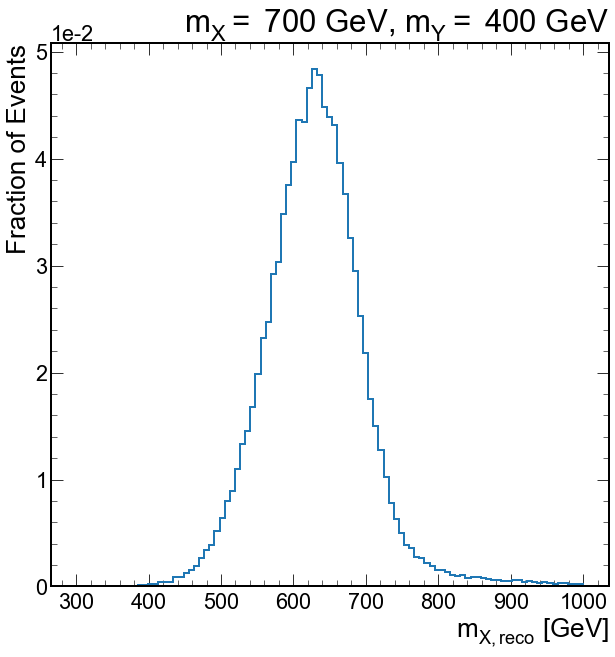

In [26]:
fig, ax = plt.subplots()

n,e = Hist(X.m, bins=np.linspace(300,1000,100), ax=ax, density=1)

ax.set_title(signal_tree.sample, loc='right')

ax.set_ylabel('Fraction of Events')
ax.set_xlabel(r'$m_{X,reco}$ [GeV]')

fig.savefig('mX_reco.pdf')

In [8]:
nfound_presel = signal_tree.nfound_presel
nfound_nn = signal_tree.nfound_nn
nfound_nn_h = signal_tree.nfound_nn_h
nn_eff = ak.sum(nfound_nn == 6)/len(nfound_nn)
nn_eff_6b = ak.sum((nfound_nn == 6) & (nfound_presel == 6))/ak.sum(nfound_presel == 6)
nn_eff_H = ak.sum((nfound_nn_h == 3))/len(nfound_nn_h)
nn_eff_H_6b = ak.sum((nfound_nn_h == 3) & (nfound_presel == 6))/ak.sum(nfound_presel == 6)
nn_eff_H_6b_correct = ak.sum((nfound_nn_h == 3) & (nfound_nn == 6) & (nfound_presel == 6))/ak.sum(nfound_nn == 6)

nfound_t6 = signal_tree.nfound_t6
nfound_t6_h = signal_tree.nfound_t6_h
t6_eff = ak.sum(nfound_t6 == 6)/len(nfound_t6)
t6_eff_6b = ak.sum((nfound_t6 == 6) & (nfound_presel == 6))/ak.sum(nfound_presel == 6)
t6_eff_H = ak.sum(nfound_t6_h == 3)/len(nfound_t6_h)
t6_eff_H_6b = ak.sum((nfound_t6_h == 3) & (nfound_presel == 6))/ak.sum(nfound_presel == 6)
t6_eff_H_6b_correct = ak.sum((nfound_t6_h == 3) & (nfound_t6 == 6) & (nfound_presel == 6))/ak.sum(nfound_t6 == 6)

In [9]:
print(nn_eff)
print(nn_eff_6b)
print(nn_eff_H)
print(nn_eff_H_6b)
print(nn_eff_H_6b_correct)
print()
print(t6_eff)
print(t6_eff_6b)
print(t6_eff_H)
print(t6_eff_H_6b)
print(t6_eff_H_6b_correct)

0.2566412335716854
0.743823899735155
0.18246914073423082
0.5288507460526506
0.7109891820375126

0.25048436064394997
0.7259794202353214
0.14588742859425557
0.42282588245509933
0.5824213065406774


In [10]:
import vector

In [11]:
signal_tree.t6_jet_higgsIdx

<Array [[2, 0, 1, 2, 0, 1, ... 1, 2, 0, 1, 2]] type='200264 * var * int32'>

In [12]:
[signal_tree.t6_jet_higgsIdx == 0]

[<Array [[False, True, False, ... False, False]] type='200264 * var * bool'>]

In [13]:
H1_b1 = vector.obj(
    pt=signal_tree.t6_jet_pt[signal_tree.t6_jet_higgsIdx == 0][:,0], 
    eta=signal_tree.t6_jet_eta[signal_tree.t6_jet_higgsIdx == 0][:,0], 
    phi=signal_tree.t6_jet_phi[signal_tree.t6_jet_higgsIdx == 0][:,0], 
    m=signal_tree.t6_jet_m[signal_tree.t6_jet_higgsIdx == 0][:,0])
H1_b2 = vector.obj(
    pt=signal_tree.t6_jet_pt[signal_tree.t6_jet_higgsIdx == 0][:,1], 
    eta=signal_tree.t6_jet_eta[signal_tree.t6_jet_higgsIdx == 0][:,1], 
    phi=signal_tree.t6_jet_phi[signal_tree.t6_jet_higgsIdx == 0][:,1], 
    m=signal_tree.t6_jet_m[signal_tree.t6_jet_higgsIdx == 0][:,1])
H2_b1 = vector.obj(
    pt=signal_tree.t6_jet_pt[signal_tree.t6_jet_higgsIdx == 1][:,0], 
    eta=signal_tree.t6_jet_eta[signal_tree.t6_jet_higgsIdx == 1][:,0], 
    phi=signal_tree.t6_jet_phi[signal_tree.t6_jet_higgsIdx == 1][:,0], 
    m=signal_tree.t6_jet_m[signal_tree.t6_jet_higgsIdx == 1][:,0])
H2_b2 = vector.obj(
    pt=signal_tree.t6_jet_pt[signal_tree.t6_jet_higgsIdx == 1][:,1], 
    eta=signal_tree.t6_jet_eta[signal_tree.t6_jet_higgsIdx == 1][:,1], 
    phi=signal_tree.t6_jet_phi[signal_tree.t6_jet_higgsIdx == 1][:,1], 
    m=signal_tree.t6_jet_m[signal_tree.t6_jet_higgsIdx == 1][:,1])
H3_b1 = vector.obj(
    pt=signal_tree.t6_jet_pt[signal_tree.t6_jet_higgsIdx == 2][:,0], 
    eta=signal_tree.t6_jet_eta[signal_tree.t6_jet_higgsIdx == 2][:,0], 
    phi=signal_tree.t6_jet_phi[signal_tree.t6_jet_higgsIdx == 2][:,0], 
    m=signal_tree.t6_jet_m[signal_tree.t6_jet_higgsIdx == 2][:,0])
H3_b2 = vector.obj(
    pt=signal_tree.t6_jet_pt[signal_tree.t6_jet_higgsIdx == 2][:,1], 
    eta=signal_tree.t6_jet_eta[signal_tree.t6_jet_higgsIdx == 2][:,1], 
    phi=signal_tree.t6_jet_phi[signal_tree.t6_jet_higgsIdx == 2][:,1], 
    m=signal_tree.t6_jet_m[signal_tree.t6_jet_higgsIdx == 2][:,1])

In [14]:
H1 = vector.obj(pt=signal_tree.t6_higgs_pt[:,0], eta=signal_tree.t6_higgs_eta[:,0], phi=signal_tree.t6_higgs_phi[:,0], m=signal_tree.t6_higgs_m[:,0])
H2 = vector.obj(pt=signal_tree.t6_higgs_pt[:,1], eta=signal_tree.t6_higgs_eta[:,1], phi=signal_tree.t6_higgs_phi[:,1], m=signal_tree.t6_higgs_m[:,1])
H3 = vector.obj(pt=signal_tree.t6_higgs_pt[:,2], eta=signal_tree.t6_higgs_eta[:,2], phi=signal_tree.t6_higgs_phi[:,2], m=signal_tree.t6_higgs_m[:,2])

In [15]:
H1_dR = H1_b1.deltaR(H1_b2)
H2_dR = H2_b1.deltaR(H2_b2)
H3_dR = H3_b1.deltaR(H3_b2)

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


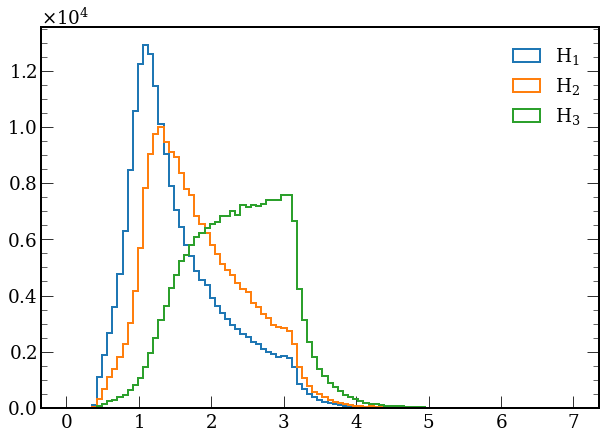

In [16]:
bins = np.linspace(0,7,100)
fig, ax = plt.subplots(figsize=(10,7))

fig, ax, n, edges = Hist(H1_dR, bins=bins, label=r'$H_1$', fig=fig, ax=ax)
fig, ax, n, edges = Hist(H2_dR, bins=bins, label=r'$H_2$', fig=fig, ax=ax)
fig, ax, n, edges = Hist(H3_dR, bins=bins, label=r'$H_3$', fig=fig, ax=ax)

Text(1.0, 1.0, '$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

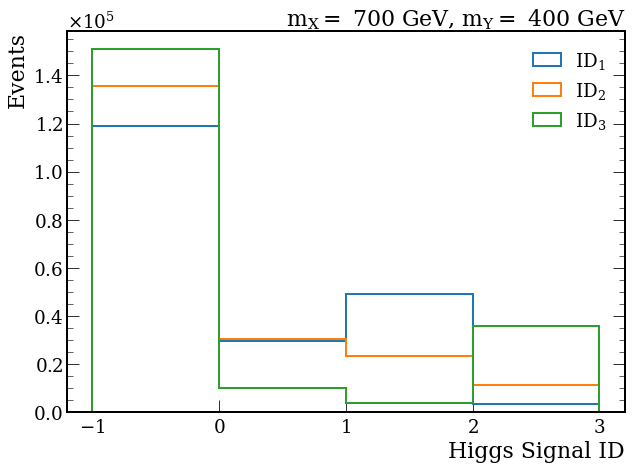

In [17]:
bins = np.arange(-1,4)
fig, ax = plt.subplots(figsize=(10,7))

fig, ax, n, edges = Hist(signal_tree.t6_higgs_signalId[:,0], bins=bins, label=r'ID$_1$', fig=fig, ax=ax)
fig, ax, n, edges = Hist(signal_tree.t6_higgs_signalId[:,1], bins=bins, label=r'ID$_2$', fig=fig, ax=ax)
fig, ax, n, edges = Hist(signal_tree.t6_higgs_signalId[:,2], bins=bins, label=r'ID$_3$', fig=fig, ax=ax)
ax.set_xticks(np.arange(-1,4))
ax.set_xlabel('Higgs Signal ID')
ax.set_ylabel('Events')
ax.set_title(signal_tree.sample, loc='right')

fig.savefig('')

Text(1.0, 1.0, '$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

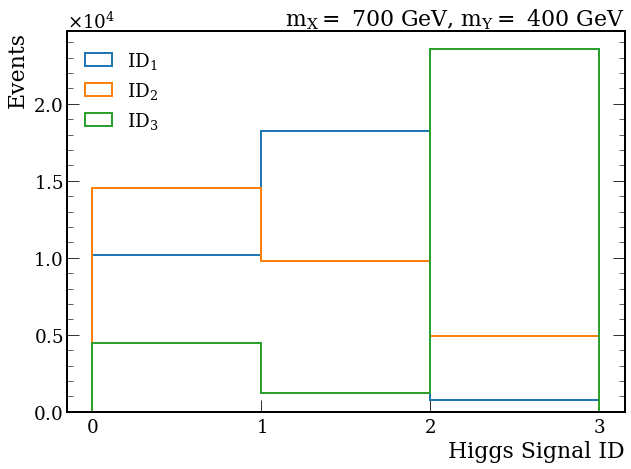

In [18]:
bins = np.arange(4)
fig, ax = plt.subplots(figsize=(10,7))

fig, ax, n, edges = Hist(signal_tree.t6_higgs_signalId[:,0][signal_tree.nfound_t6_h == 3], bins=bins, label=r'ID$_1$', fig=fig, ax=ax)
fig, ax, n, edges = Hist(signal_tree.t6_higgs_signalId[:,1][signal_tree.nfound_t6_h == 3], bins=bins, label=r'ID$_2$', fig=fig, ax=ax)
fig, ax, n, edges = Hist(signal_tree.t6_higgs_signalId[:,2][signal_tree.nfound_t6_h == 3], bins=bins, label=r'ID$_3$', fig=fig, ax=ax)
ax.set_xticks(np.arange(4))
ax.legend(loc=2)
ax.set_xlabel('Higgs Signal ID')
ax.set_ylabel('Events')
ax.set_title(signal_tree.sample, loc='right')

Text(1.0, 1.0, '$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

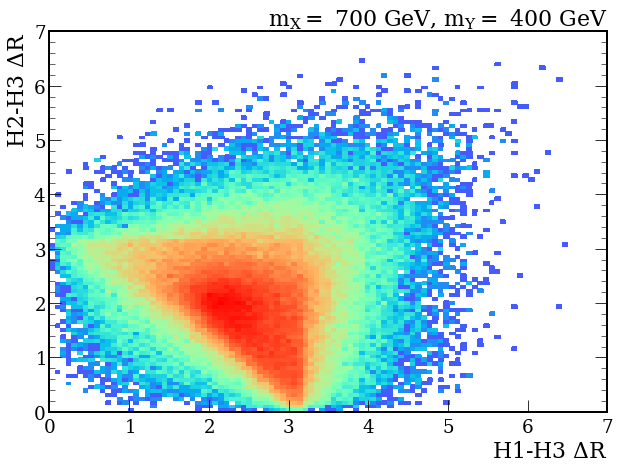

In [19]:
bins = np.linspace(0,7,100)
fig, ax = plt.subplots(figsize=(10,7))

n, xe, ye, im = Hist2d(x=H1.deltaR(H3), y=H2.deltaR(H3), bins=(bins, bins), label=r'$H_1-H_3$', fig=fig, ax=ax)
ax.set_xlabel(r'H1-H3 $\Delta R$')
ax.set_ylabel(r'H2-H3 $\Delta R$')
ax.set_title(signal_tree.sample, loc='right')

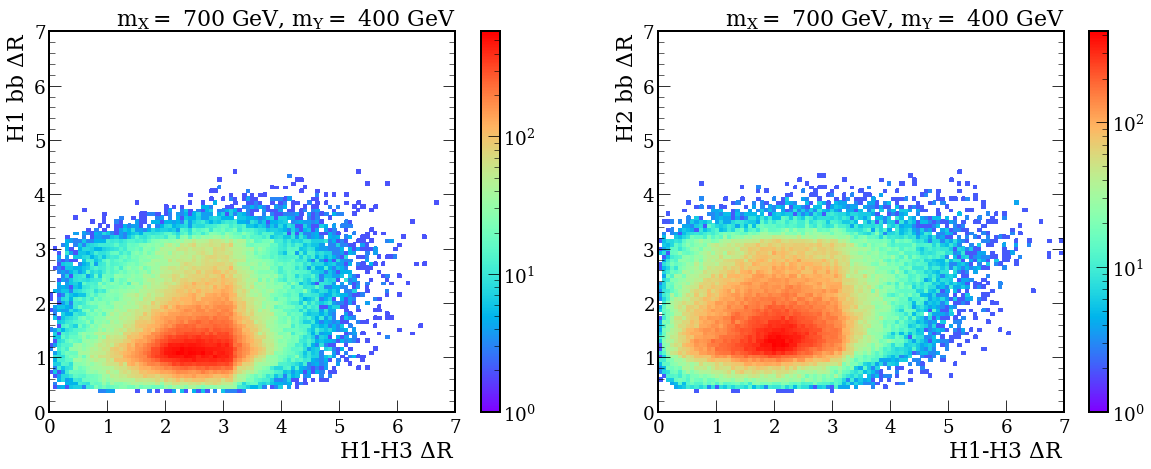

In [20]:
bins = np.linspace(0,7,100)
fig, axs = plt.subplots(figsize=(20,7), nrows=1, ncols=2)

ax = axs[0]
n, xe, ye, im = Hist2d(x=H1.deltaR(H3), y=H1_dR, bins=(bins, bins), label=r'$H_1-H_3$', fig=fig, ax=ax)
ax.set_xlabel(r'H1-H3 $\Delta R$')
ax.set_ylabel(r'H1 bb $\Delta R$')
ax.set_title(signal_tree.sample, loc='right')
fig.colorbar(im, ax=ax)

ax = axs[1]
n, xe, ye, im = Hist2d(x=H2.deltaR(H3), y=H2_dR, bins=(bins, bins), label=r'$H_1-H_3$', fig=fig, ax=ax)
ax.set_xlabel(r'H1-H3 $\Delta R$')
ax.set_ylabel(r'H2 bb $\Delta R$')
ax.set_title(signal_tree.sample, loc='right')
fig.colorbar(im, ax=ax)

Text(1.0, 1.0, '$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

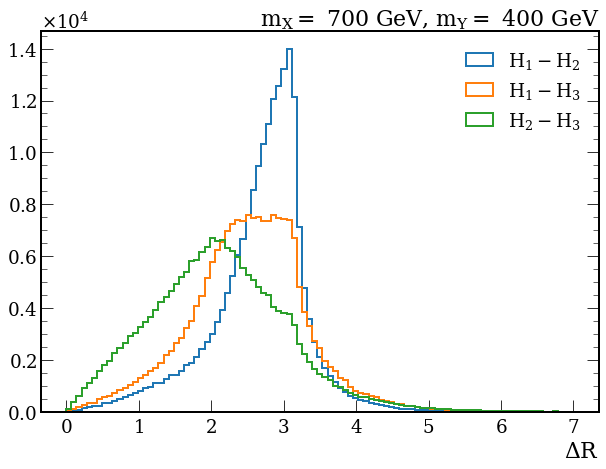

In [21]:
bins = np.linspace(0,7,100)
fig, ax = plt.subplots(figsize=(10,7))

fig, ax, n, edges = Hist(H1.deltaR(H2), bins=bins, label=r'$H_1-H_2$', fig=fig, ax=ax)
fig, ax, n, edges = Hist(H1.deltaR(H3), bins=bins, label=r'$H_1-H_3$', fig=fig, ax=ax)
fig, ax, n, edges = Hist(H2.deltaR(H3), bins=bins, label=r'$H_2-H_3$', fig=fig, ax=ax)
ax.set_xlabel(r'$\Delta R$')
ax.set_title(signal_tree.sample, loc='right')

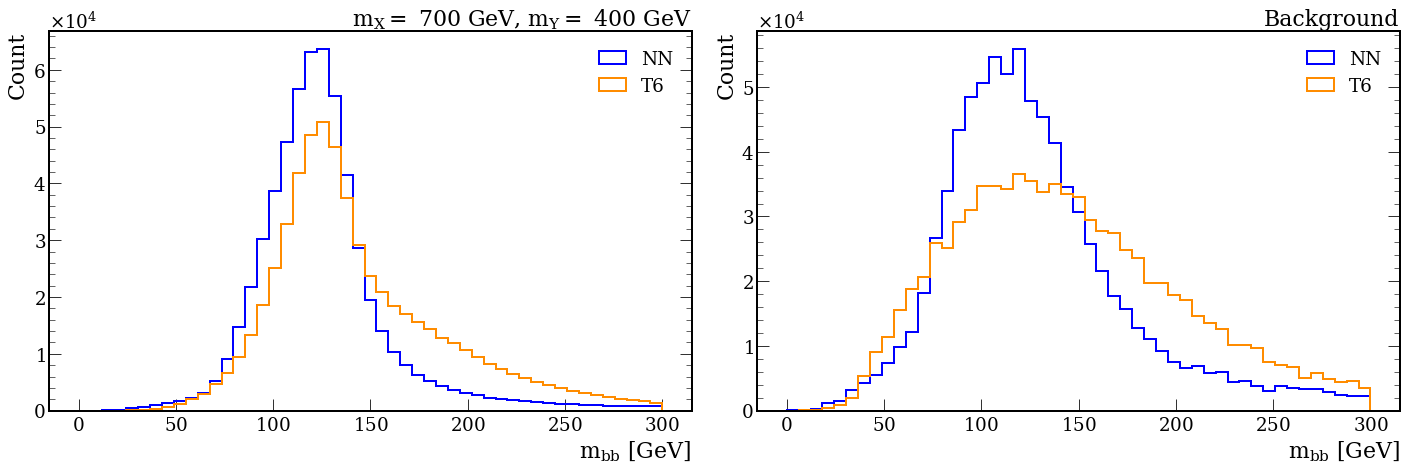

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

ax = axs[0]
fig, ax, n, b = Hist(ak.flatten(signal_tree.nn_higgs_m), bins=mH_bins, fig=fig, ax=ax, label='NN', color='blue')
fig, ax, n, b = Hist(ak.flatten(signal_tree.t6_higgs_m), bins=mH_bins, fig=fig, ax=ax, label='T6', color='darkorange')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.set_title(signal_tree.sample, loc='right')

ax = axs[1]
fig, ax, n, b = Hist(bkgd_tree.nn_higgs_m, bins=mH_bins, fig=fig, ax=ax, label='NN', scale=bkgd_tree.scale, color='blue')
fig, ax, n, b = Hist(bkgd_tree.t6_higgs_m, bins=mH_bins, fig=fig, ax=ax, label='T6', scale=bkgd_tree.scale, color='darkorange')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.set_title('Background', loc='right')

plt.tight_layout()

fig.savefig('plots/sig_to_bkg/mH_dist_NNvT6_SIGvBKG.pdf')

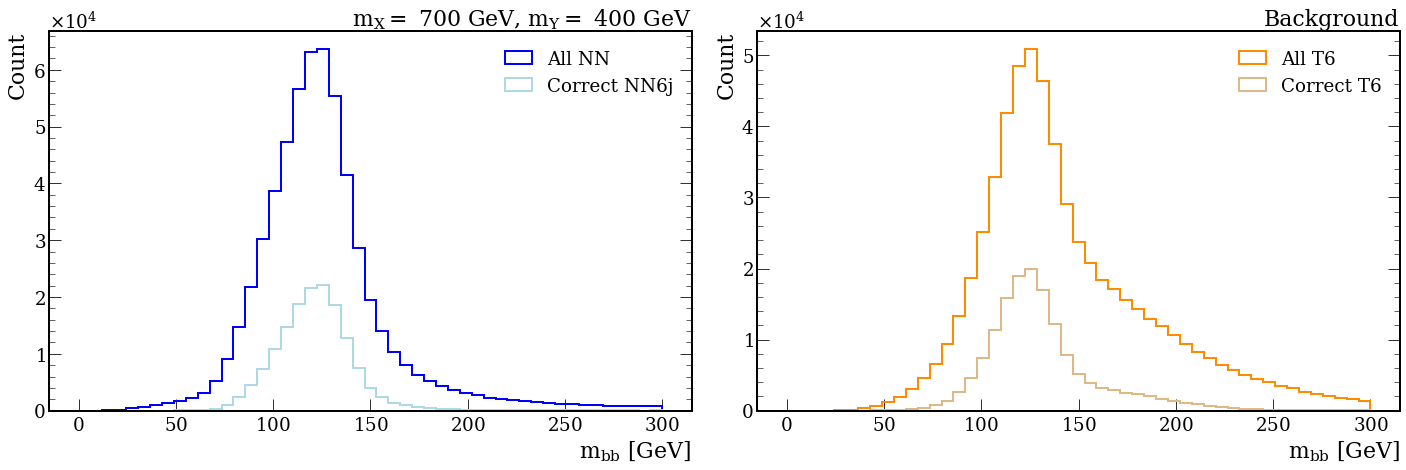

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

ax = axs[0]
fig, ax, n, b = Hist(ak.flatten(signal_tree.nn_higgs_m), bins=mH_bins, fig=fig, ax=ax, label='All NN', color='blue')
fig, ax, n, b = Hist(ak.flatten(signal_tree.nn_higgs_m[signal_tree.nfound_nn == 6]), bins=mH_bins, fig=fig, ax=ax, label='Correct NN6j', color='lightblue')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.set_title(signal_tree.sample, loc='right')

ax = axs[1]
fig, ax, n, b = Hist(signal_tree.t6_higgs_m, bins=mH_bins, fig=fig, ax=ax, label='All T6', color='darkorange')
fig, ax, n, b = Hist(signal_tree.t6_higgs_m[signal_tree.nfound_t6 == 6], bins=mH_bins, fig=fig, ax=ax, label='Correct T6', color='burlywood')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.set_title('Background', loc='right')

plt.tight_layout()

fig.savefig('plots/sig_to_bkg/mH_dist_NNvT6_SIGvBKG_correct.pdf')

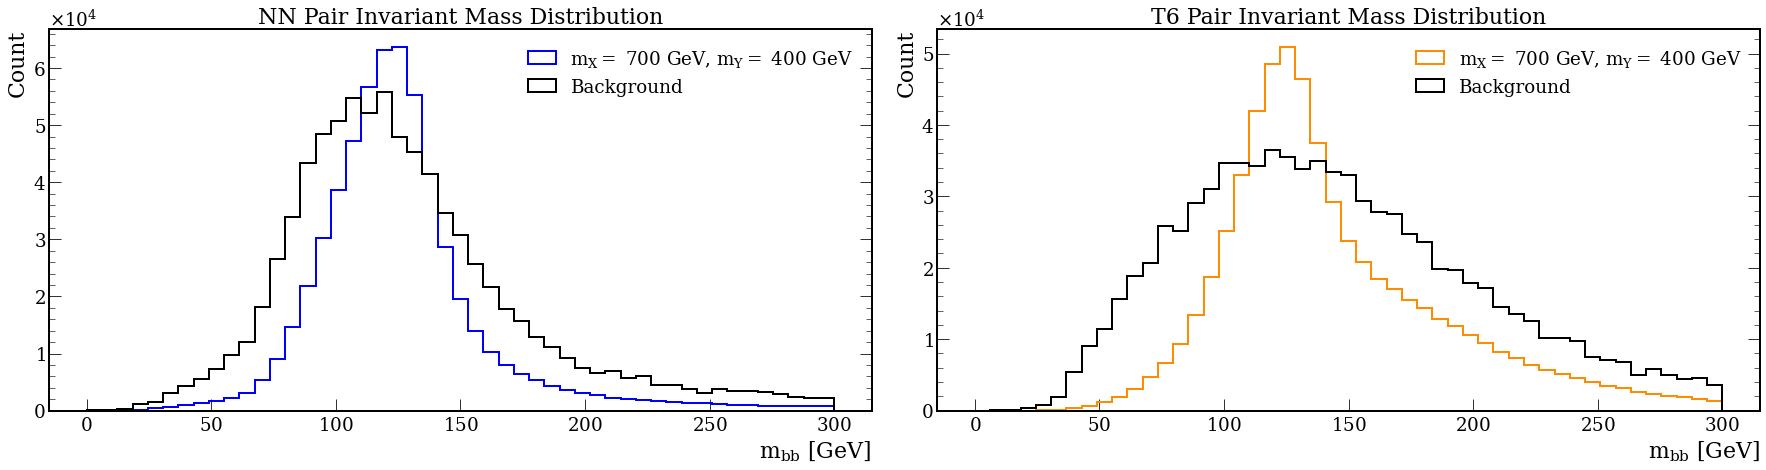

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25,7))

ax = axs[0]
ax.set_title('NN Pair Invariant Mass Distribution')
fig, ax, n, b = Hist(ak.flatten(signal_tree.nn_higgs_m), bins=mH_bins, fig=fig, ax=ax, label=signal_tree.sample, color='blue')
fig, ax, n, b = Hist(bkgd_tree.nn_higgs_m, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[1]
ax.set_title('T6 Pair Invariant Mass Distribution')
fig, ax, n, b = Hist(ak.flatten(signal_tree.t6_higgs_m), bins=mH_bins, fig=fig, ax=ax, label=signal_tree.sample, color='darkorange')
fig, ax, n, b = Hist(bkgd_tree.t6_higgs_m, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()

fig.savefig('plots/sig_to_bkg/mH_dist_NNandT6_SIGvBKG.pdf')

In [25]:
bkgd_mass_6jcut = []
bkgd_t6mass_6jcut = []
for bkg_m, bkg_t6, bkg_score in zip(bkgd_tree.nn_higgs_m, bkgd_tree.t6_higgs_m, bkgd_tree.b_6j_score):
    bkgd_mass_6jcut.append(bkg_m[bkg_score > 0.8])
    bkgd_t6mass_6jcut.append(bkg_t6[bkg_score > 0.8])

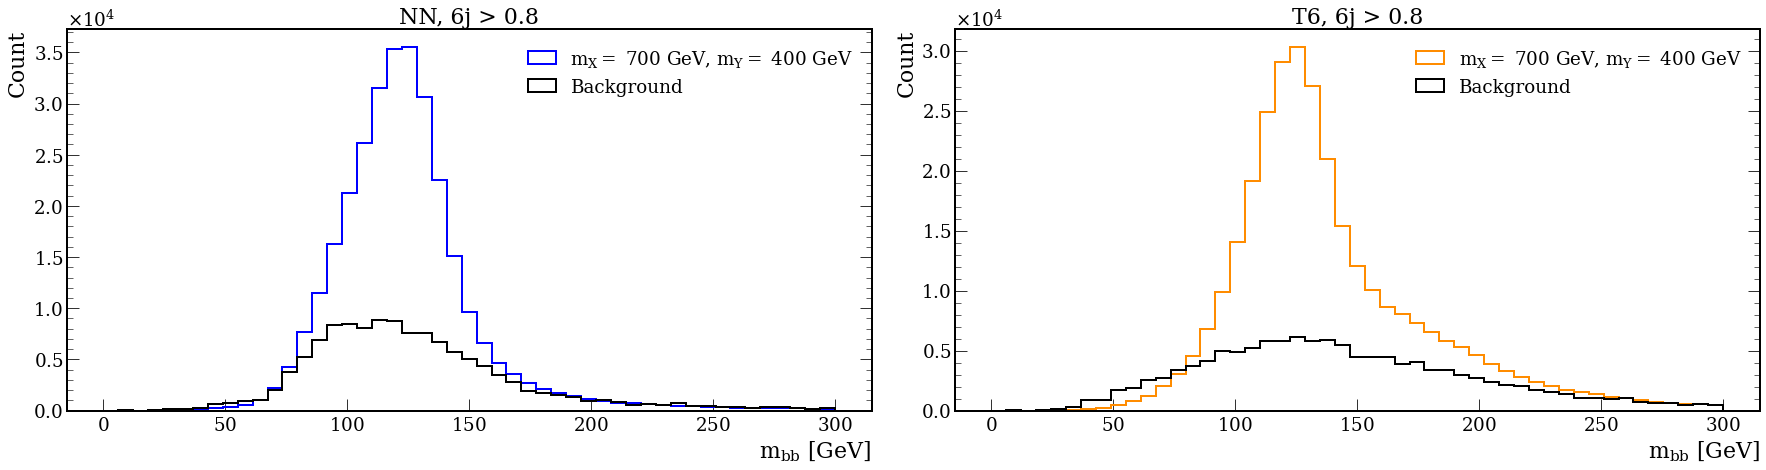

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25,7))

ax = axs[0]
ax.set_title('NN, 6j > 0.8')
fig, ax, n, b = Hist(ak.flatten(signal_tree.nn_higgs_m[signal_tree.b_6j_score > 0.8]), bins=mH_bins, fig=fig, ax=ax, label=signal_tree.sample, color='blue')
fig, ax, n, b = Hist(bkgd_mass_6jcut, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[1]
ax.set_title('T6, 6j > 0.8')
fig, ax, n, b = Hist(ak.flatten(signal_tree.t6_higgs_m[signal_tree.b_6j_score > 0.8]), bins=mH_bins, fig=fig, ax=ax, label=signal_tree.sample, color='darkorange')
fig, ax, n, b = Hist(bkgd_t6mass_6jcut, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()

fig.savefig('plots/sig_to_bkg/mH_dist_NNvT6_SIGvBKG_6jcut.pdf')

In [27]:
nn_contains_3H = signal_tree.nfound_nn_h == 3
events_contain_sixb = ak.sum(signal_tree.jet_signalId > -1, axis=1) == 6

wrong_higgs = ak.flatten(signal_tree.nn_higgs_m[signal_tree.nn_higgs_signalId < 0])
right_higgs = ak.flatten(signal_tree.nn_higgs_m[signal_tree.nn_higgs_signalId > -1])

sixb_wrong_higgs = ak.flatten(signal_tree.nn_higgs_m[events_contain_sixb][signal_tree.nn_higgs_signalId[events_contain_sixb] < 0])
sixb_right_higgs = ak.flatten(signal_tree.nn_higgs_m[events_contain_sixb][signal_tree.nn_higgs_signalId[events_contain_sixb] > -1])

threeH_wrong_higgs = ak.flatten(signal_tree.nn_higgs_m[events_contain_sixb & nn_contains_3H][signal_tree.nn_higgs_signalId[events_contain_sixb & nn_contains_3H] < 0])
threeH_right_higgs = ak.flatten(signal_tree.nn_higgs_m[events_contain_sixb & nn_contains_3H][signal_tree.nn_higgs_signalId[events_contain_sixb & nn_contains_3H] > -1])

0.4647653771680468


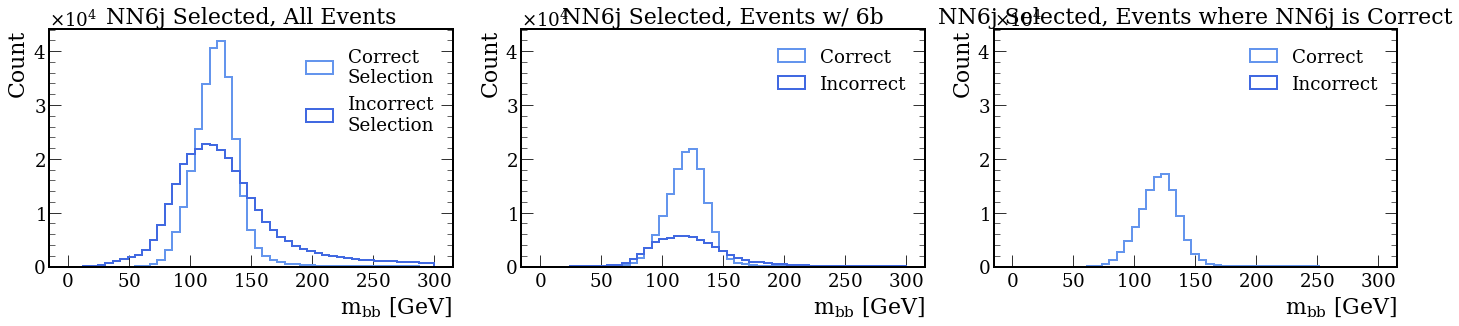

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

ax = axs[0]
ax.set_title('NN6j Selected, All Events')
fig, ax, n_c, b = Hist(right_higgs, bins=mH_bins, fig=fig, ax=ax, label='Correct\nSelection', color='cornflowerblue')
fig, ax, n_inc, b = Hist(wrong_higgs, bins=mH_bins, fig=fig, ax=ax, label='Incorrect\nSelection', color='royalblue')
ymin, ymax = ax.get_ylim()
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
print(n_c.sum()/(n_c.sum() + n_inc.sum()))

ax = axs[1]
ax.set_title('NN6j Selected, Events w/ 6b')
fig, ax, n, b = Hist(sixb_right_higgs, bins=mH_bins, fig=fig, ax=ax, label='Correct', color='cornflowerblue')
fig, ax, n, b = Hist(sixb_wrong_higgs, bins=mH_bins, fig=fig, ax=ax, label='Incorrect', color='royalblue')
ax.set_ylim(ymin, ymax)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[2]
ax.set_title('NN6j Selected, Events where NN6j is Correct')
fig, ax, n, b = Hist(threeH_right_higgs, bins=mH_bins, fig=fig, ax=ax, label='Correct', color='cornflowerblue')
fig, ax, n, b = Hist(threeH_wrong_higgs, bins=mH_bins, fig=fig, ax=ax, label='Incorrect', color='royalblue')
ax.set_ylim(ymin, ymax)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()

Text(0, 1, 'Count')

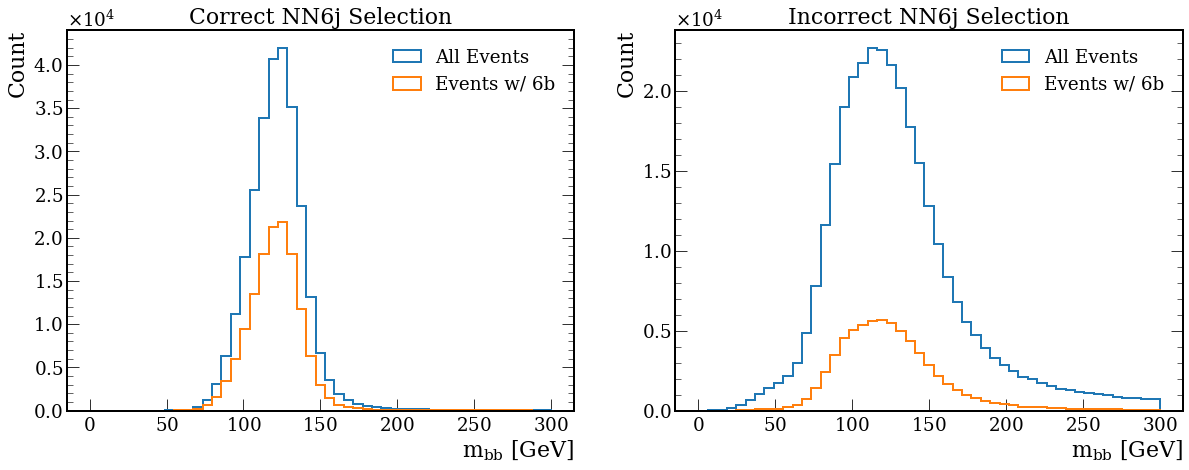

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

ax = axs[0]
ax.set_title('Correct NN6j Selection')
fig, ax, n, b = Hist(right_higgs, bins=mH_bins, fig=fig, ax=ax, label='All Events')
fig, ax, n, b = Hist(sixb_right_higgs, bins=mH_bins, fig=fig, ax=ax, label='Events w/ 6b')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[1]
ax.set_title('Incorrect NN6j Selection')
fig, ax, n, b = Hist(wrong_higgs, bins=mH_bins, fig=fig, ax=ax, label='All Events')
fig, ax, n, b = Hist(sixb_wrong_higgs, bins=mH_bins, fig=fig, ax=ax, label='Events w/ 6b')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

Text(0, 1, 'Count')

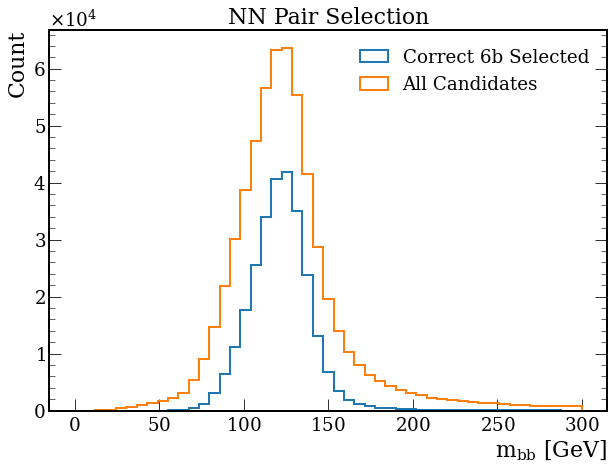

In [30]:
fig, ax = plt.subplots(figsize=(10,7))

ax.set_title('NN Pair Selection')
fig, ax, n, b = Hist(right_higgs, bins=mH_bins, fig=fig, ax=ax, label='Correct 6b Selected')
n, b = np.histogram(np.concatenate((right_higgs.to_numpy(), wrong_higgs.to_numpy())), bins=mH_bins)
fig, ax, n, b = Hist(x_bins(mH_bins), weights=n, bins=mH_bins, fig=fig, ax=ax, label='All Candidates')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

In [31]:
wrong_higgs1 = signal_tree.nn_higgs_m[:,0][signal_tree.nn_higgs_signalId[:,0] < 0]
wrong_higgs2 = signal_tree.nn_higgs_m[:,1][signal_tree.nn_higgs_signalId[:,1] < 0]
wrong_higgs3 = signal_tree.nn_higgs_m[:,2][signal_tree.nn_higgs_signalId[:,2] < 0]
right_higgs1 = signal_tree.nn_higgs_m[:,0][signal_tree.nn_higgs_signalId[:,0] > -1]
right_higgs2 = signal_tree.nn_higgs_m[:,1][signal_tree.nn_higgs_signalId[:,1] > -1]
right_higgs3 = signal_tree.nn_higgs_m[:,2][signal_tree.nn_higgs_signalId[:,2] > -1]

wrong_higgs1_score = signal_tree.nn_higgs_m[:,0][signal_tree.b_3d_score > 0.8][signal_tree.nn_higgs_signalId[:,0][signal_tree.b_3d_score > 0.8] < 0]
wrong_higgs2_score = signal_tree.nn_higgs_m[:,1][signal_tree.b_3d_score > 0.8][signal_tree.nn_higgs_signalId[:,1][signal_tree.b_3d_score > 0.8] < 0]
wrong_higgs3_score = signal_tree.nn_higgs_m[:,2][signal_tree.b_3d_score > 0.8][signal_tree.nn_higgs_signalId[:,2][signal_tree.b_3d_score > 0.8] < 0]
right_higgs1_score = signal_tree.nn_higgs_m[:,0][signal_tree.b_3d_score > 0.8][signal_tree.nn_higgs_signalId[:,0][signal_tree.b_3d_score > 0.8] > -1]
right_higgs2_score = signal_tree.nn_higgs_m[:,1][signal_tree.b_3d_score > 0.8][signal_tree.nn_higgs_signalId[:,1][signal_tree.b_3d_score > 0.8] > -1]
right_higgs3_score = signal_tree.nn_higgs_m[:,2][signal_tree.b_3d_score > 0.8][signal_tree.nn_higgs_signalId[:,2][signal_tree.b_3d_score > 0.8] > -1]

wrong_higgs1_scores = signal_tree.nn_higgs_m[:,0][(signal_tree.b_3d_score > 0.8) & (signal_tree.b_6j_score > 0.8)][signal_tree.nn_higgs_signalId[:,0][(signal_tree.b_3d_score > 0.8) & (signal_tree.b_6j_score > 0.8)] < 0]
wrong_higgs2_scores = signal_tree.nn_higgs_m[:,1][(signal_tree.b_3d_score > 0.8) & (signal_tree.b_6j_score > 0.8)][signal_tree.nn_higgs_signalId[:,1][(signal_tree.b_3d_score > 0.8) & (signal_tree.b_6j_score > 0.8)] < 0]
wrong_higgs3_scores = signal_tree.nn_higgs_m[:,2][(signal_tree.b_3d_score > 0.8) & (signal_tree.b_6j_score > 0.8)][signal_tree.nn_higgs_signalId[:,2][(signal_tree.b_3d_score > 0.8) & (signal_tree.b_6j_score > 0.8)] < 0]
right_higgs1_scores = signal_tree.nn_higgs_m[:,0][(signal_tree.b_3d_score > 0.8) & (signal_tree.b_6j_score > 0.8)][signal_tree.nn_higgs_signalId[:,0][(signal_tree.b_3d_score > 0.8) & (signal_tree.b_6j_score > 0.8)] > -1]
right_higgs2_scores = signal_tree.nn_higgs_m[:,1][(signal_tree.b_3d_score > 0.8) & (signal_tree.b_6j_score > 0.8)][signal_tree.nn_higgs_signalId[:,1][(signal_tree.b_3d_score > 0.8) & (signal_tree.b_6j_score > 0.8)] > -1]
right_higgs3_scores = signal_tree.nn_higgs_m[:,2][(signal_tree.b_3d_score > 0.8) & (signal_tree.b_6j_score > 0.8)][signal_tree.nn_higgs_signalId[:,2][(signal_tree.b_3d_score > 0.8) & (signal_tree.b_6j_score > 0.8)] > -1]

sixb_wrong_higgs1 = signal_tree.nn_higgs_m[:,0][events_contain_sixb][signal_tree.nn_higgs_signalId[:,0][events_contain_sixb] < 0]
sixb_wrong_higgs2 = signal_tree.nn_higgs_m[:,1][events_contain_sixb][signal_tree.nn_higgs_signalId[:,1][events_contain_sixb] < 0]
sixb_wrong_higgs3 = signal_tree.nn_higgs_m[:,2][events_contain_sixb][signal_tree.nn_higgs_signalId[:,2][events_contain_sixb] < 0]
sixb_right_higgs1 = signal_tree.nn_higgs_m[:,0][events_contain_sixb][signal_tree.nn_higgs_signalId[:,0][events_contain_sixb] > -1]
sixb_right_higgs2 = signal_tree.nn_higgs_m[:,1][events_contain_sixb][signal_tree.nn_higgs_signalId[:,1][events_contain_sixb] > -1]
sixb_right_higgs3 = signal_tree.nn_higgs_m[:,2][events_contain_sixb][signal_tree.nn_higgs_signalId[:,2][events_contain_sixb] > -1]

threeH_wrong_higgs1 = signal_tree.nn_higgs_m[:,0][events_contain_sixb & nn_contains_3H][signal_tree.nn_higgs_signalId[:,0][events_contain_sixb & nn_contains_3H] < 0]
threeH_wrong_higgs2 = signal_tree.nn_higgs_m[:,1][events_contain_sixb & nn_contains_3H][signal_tree.nn_higgs_signalId[:,1][events_contain_sixb & nn_contains_3H] < 0]
threeH_wrong_higgs3 = signal_tree.nn_higgs_m[:,2][events_contain_sixb & nn_contains_3H][signal_tree.nn_higgs_signalId[:,2][events_contain_sixb & nn_contains_3H] < 0]
threeH_right_higgs1 = signal_tree.nn_higgs_m[:,0][events_contain_sixb & nn_contains_3H][signal_tree.nn_higgs_signalId[:,0][events_contain_sixb & nn_contains_3H] > -1]
threeH_right_higgs2 = signal_tree.nn_higgs_m[:,1][events_contain_sixb & nn_contains_3H][signal_tree.nn_higgs_signalId[:,1][events_contain_sixb & nn_contains_3H] > -1]
threeH_right_higgs3 = signal_tree.nn_higgs_m[:,2][events_contain_sixb & nn_contains_3H][signal_tree.nn_higgs_signalId[:,2][events_contain_sixb & nn_contains_3H] > -1]

In [32]:
mH1_list = []
mH2_list = []
mH3_list = []

mH1_cut_list = []
mH2_cut_list = []
mH3_cut_list = []

mH1_2cut_list = []
mH2_2cut_list = []
mH3_2cut_list = []

for mH_arr, score2_arr, score6_arr in zip(bkgd_tree.nn_higgs_m, bkgd_tree.b_3d_score, bkgd_tree.b_6j_score):
    mH1_list.append(mH_arr[:,0])
    mH2_list.append(mH_arr[:,1])
    mH3_list.append(mH_arr[:,2])
    mH1_cut_list.append(mH_arr[:,0][score6_arr > 0.8])
    mH2_cut_list.append(mH_arr[:,1][score6_arr > 0.8])
    mH3_cut_list.append(mH_arr[:,2][score6_arr > 0.8])
    mH1_2cut_list.append(mH_arr[:,0][(score2_arr > 0.8) & (score6_arr > 0.8)])
    mH2_2cut_list.append(mH_arr[:,1][(score2_arr > 0.8) & (score6_arr > 0.8)])
    mH3_2cut_list.append(mH_arr[:,2][(score2_arr > 0.8) & (score6_arr > 0.8)])

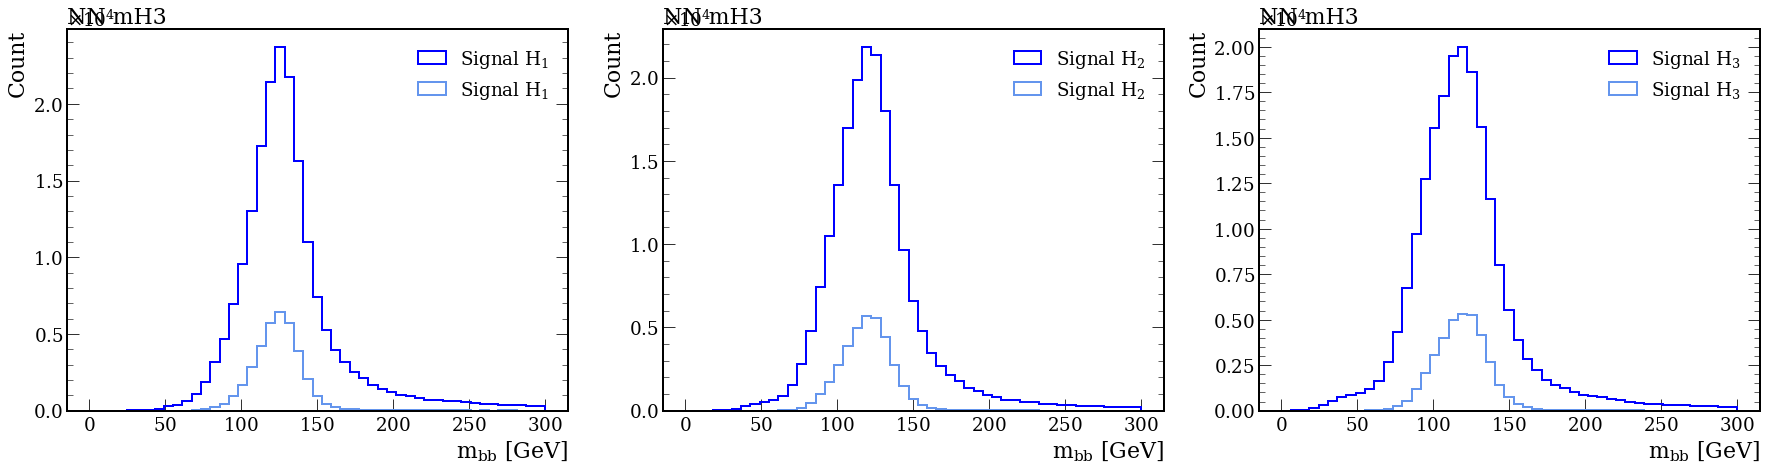

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25,7))

ax = axs[0]
ax.set_title('All Events', loc='left')
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,0], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_1$', color='blue')
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,0][signal_tree.nfound_nn_h == 3], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_1$', color='cornflowerblue')
ax.set_title('NN mH3', loc='left')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[1]
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,1], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_2$', color='blue')
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,1][signal_tree.nfound_nn_h == 3], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_2$', color='cornflowerblue')
ax.set_title('NN mH3', loc='left')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[2]
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,2], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_3$', color='blue')
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,2][signal_tree.nfound_nn_h == 3], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_3$', color='cornflowerblue')
ax.set_title('NN mH3', loc='left')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()
fig.savefig('plots/sig_to_bkg/mH3_dist_NN_SIGvBKG_correct.pdf')

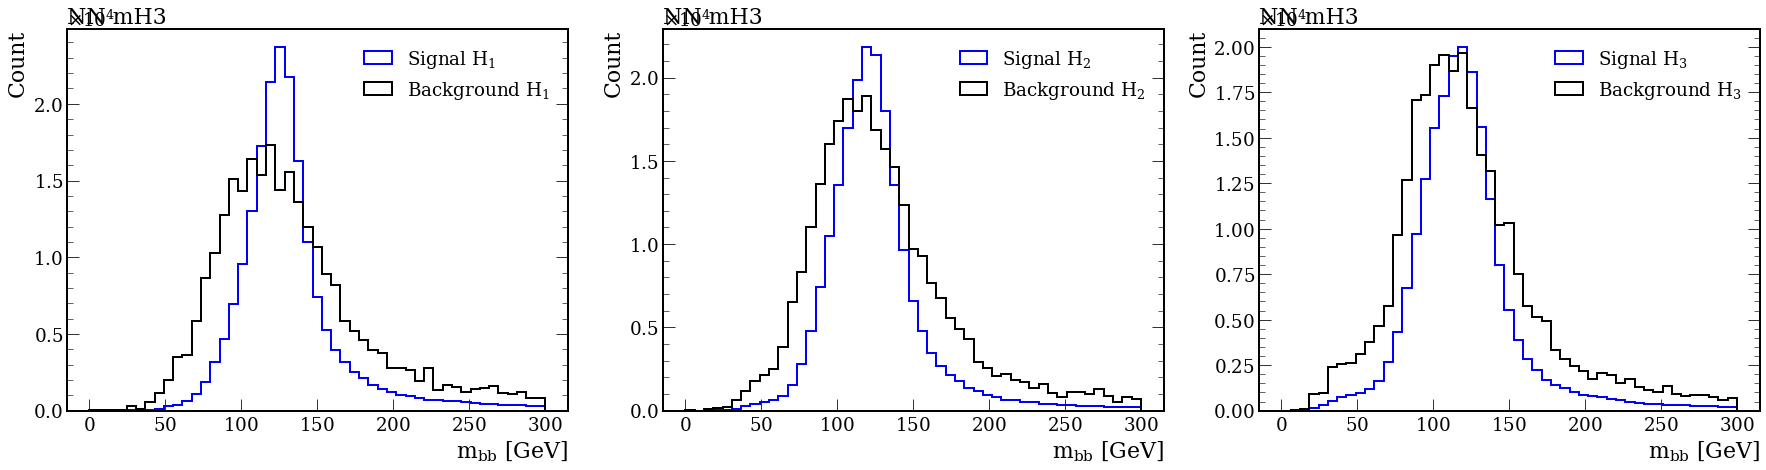

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25,7))

ax = axs[0]
ax.set_title('All Events', loc='left')
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,0], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_1$', color='blue')
fig, ax, n, b = Hist(mH1_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_1$', scale=bkgd_tree.scale, color='k')
ax.set_title('NN mH3', loc='left')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[1]
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,1], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_2$', color='blue')
fig, ax, n, b = Hist(mH2_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_2$', scale=bkgd_tree.scale, color='k')
ax.set_title('NN mH3', loc='left')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[2]
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,2], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_3$', color='blue')
fig, ax, n, b = Hist(mH3_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_3$', scale=bkgd_tree.scale, color='k')
ax.set_title('NN mH3', loc='left')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()
fig.savefig('plots/sig_to_bkg/mH3_dist_NN_SIGvBKG.pdf')

In [36]:
b_6j = signal_tree.b_6j_score > 0.8
b_3d = signal_tree.b_3d_score > 0.8

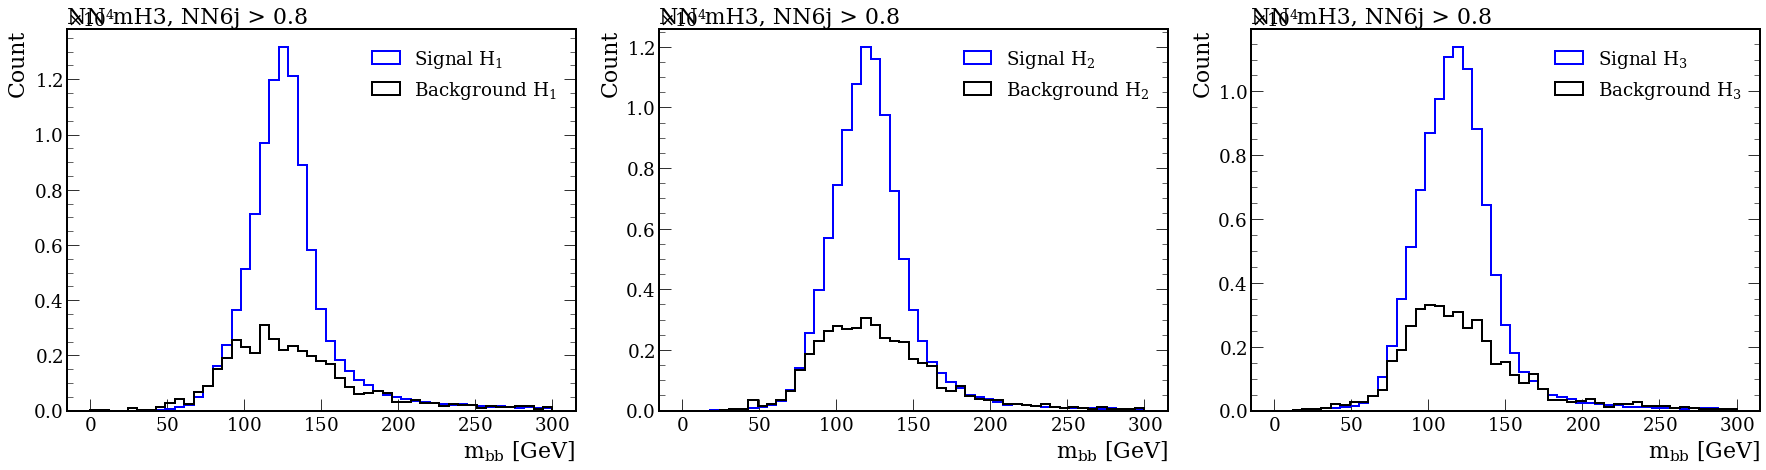

In [37]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25,7))

ax = axs[0]
ax.set_title('NN6j > 0.8', loc='left')
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,0][b_6j], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_1$', color='blue')
fig, ax, n, b = Hist(mH1_cut_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_1$', scale=bkgd_tree.scale, color='k')
ax.set_title('NN mH3, NN6j > 0.8', loc='left')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[1]
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,1][b_6j], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_2$', color='blue')
fig, ax, n, b = Hist(mH2_cut_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_2$', scale=bkgd_tree.scale, color='k')
ax.set_title('NN mH3, NN6j > 0.8', loc='left')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[2]
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,2][b_6j], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_3$', color='blue')
fig, ax, n, b = Hist(mH3_cut_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_3$', scale=bkgd_tree.scale, color='k')
ax.set_title('NN mH3, NN6j > 0.8', loc='left')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()
fig.savefig('plots/sig_to_bkg/mH3_dist_NN_SIGvBKG_NN6jcut.pdf')

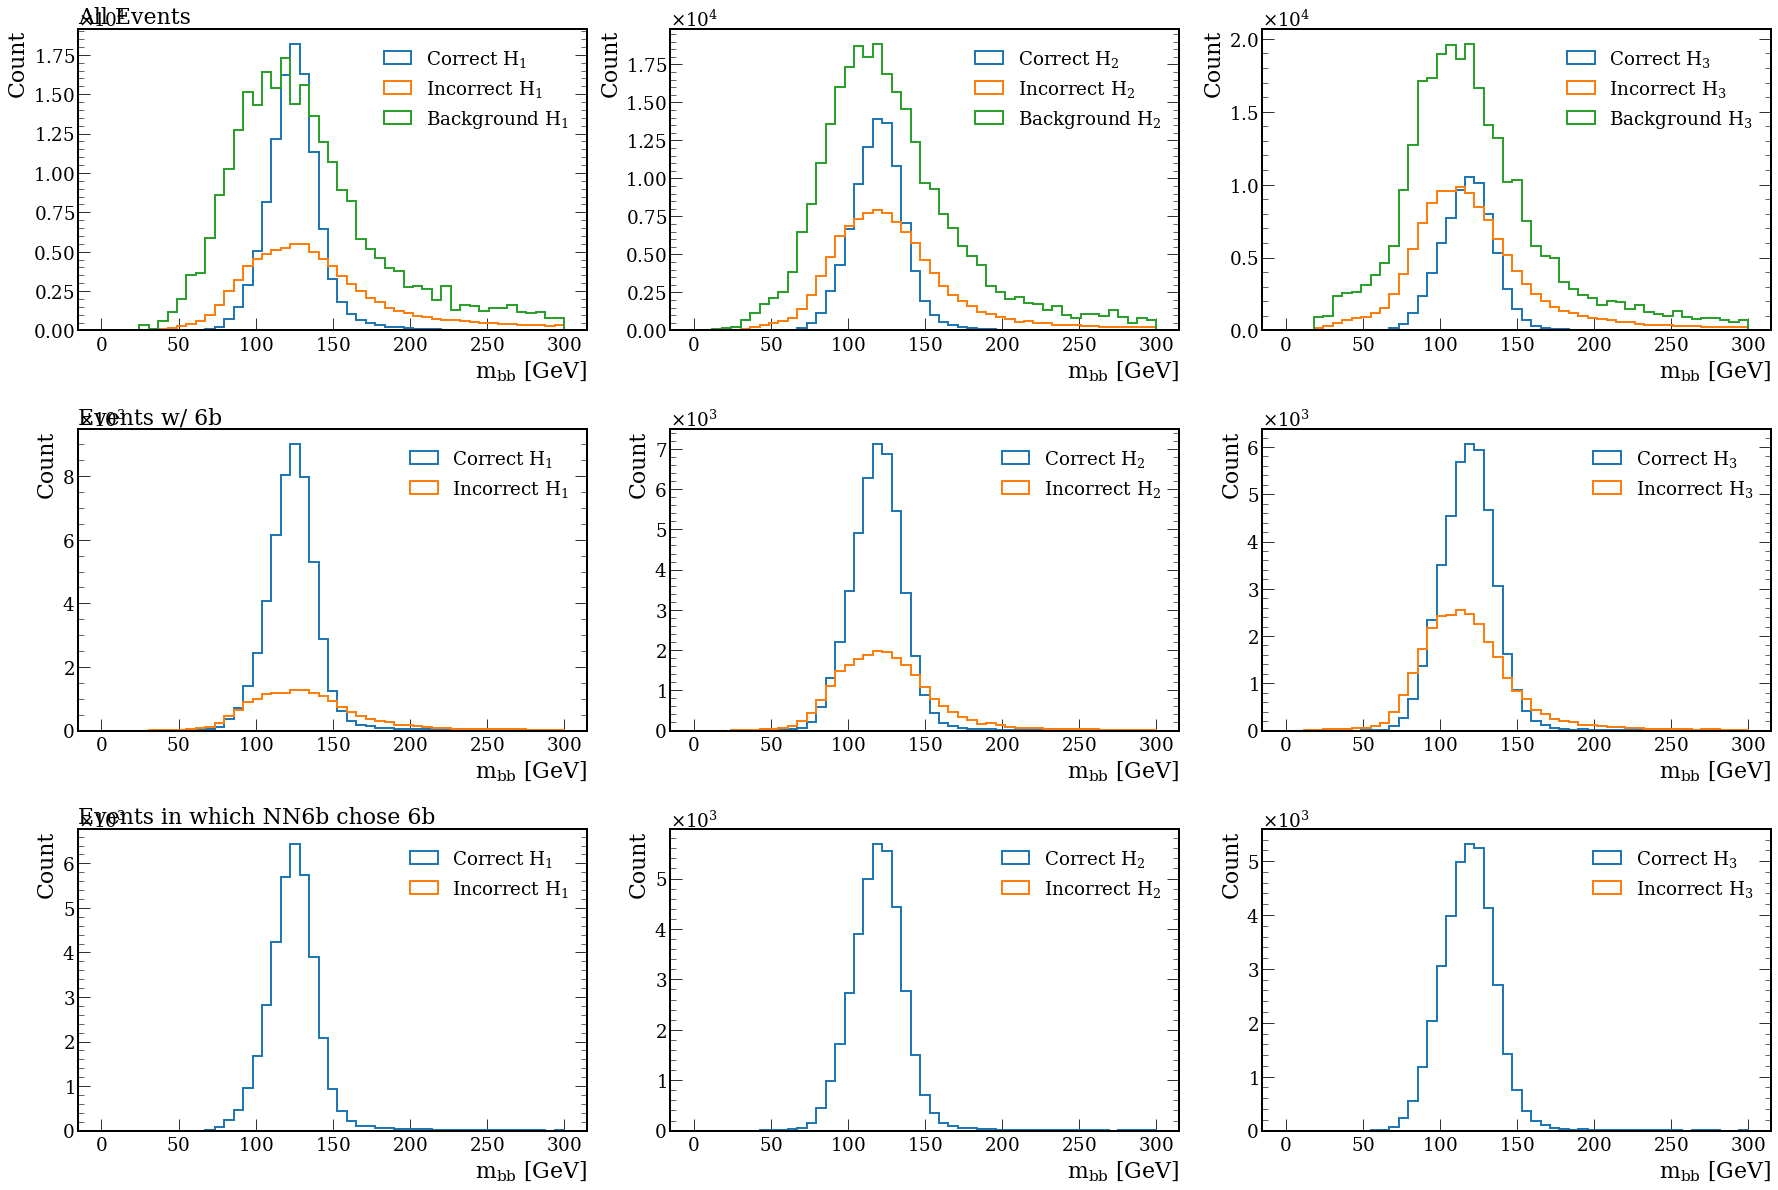

In [38]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(25,17))

ax = axs[0][0]
ax.set_title('All Events', loc='left')
fig, ax, n, b = Hist(right_higgs1, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_1$')
fig, ax, n, b = Hist(wrong_higgs1, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_1$')
fig, ax, n, b = Hist(mH1_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_1$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[0][1]
fig, ax, n, b = Hist(right_higgs2, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_2$')
fig, ax, n, b = Hist(wrong_higgs2, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_2$')
fig, ax, n, b = Hist(mH2_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_2$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[0][2]
fig, ax, n, b = Hist(right_higgs3, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_3$')
fig, ax, n, b = Hist(wrong_higgs3, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_3$')
fig, ax, n, b = Hist(mH3_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_3$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[1][0]
ax.set_title('Events w/ 6b', loc='left')
fig, ax, n, b = Hist(sixb_right_higgs1, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_1$')
fig, ax, n, b = Hist(sixb_wrong_higgs1, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_1$')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[1][1]
fig, ax, n, b = Hist(sixb_right_higgs2, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_2$')
fig, ax, n, b = Hist(sixb_wrong_higgs2, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_2$')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[1][2]
fig, ax, n, b = Hist(sixb_right_higgs3, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_3$')
fig, ax, n, b = Hist(sixb_wrong_higgs3, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_3$')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[2][0]
ax.set_title('Events in which NN6b chose 6b', loc='left')
fig, ax, n, b = Hist(threeH_right_higgs1, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_1$')
fig, ax, n, b = Hist(threeH_wrong_higgs1, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_1$')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[2][1]
fig, ax, n, b = Hist(threeH_right_higgs2, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_2$')
fig, ax, n, b = Hist(threeH_wrong_higgs2, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_2$')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[2][2]
fig, ax, n, b = Hist(threeH_right_higgs3, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_3$')
fig, ax, n, b = Hist(threeH_wrong_higgs3, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_3$')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()

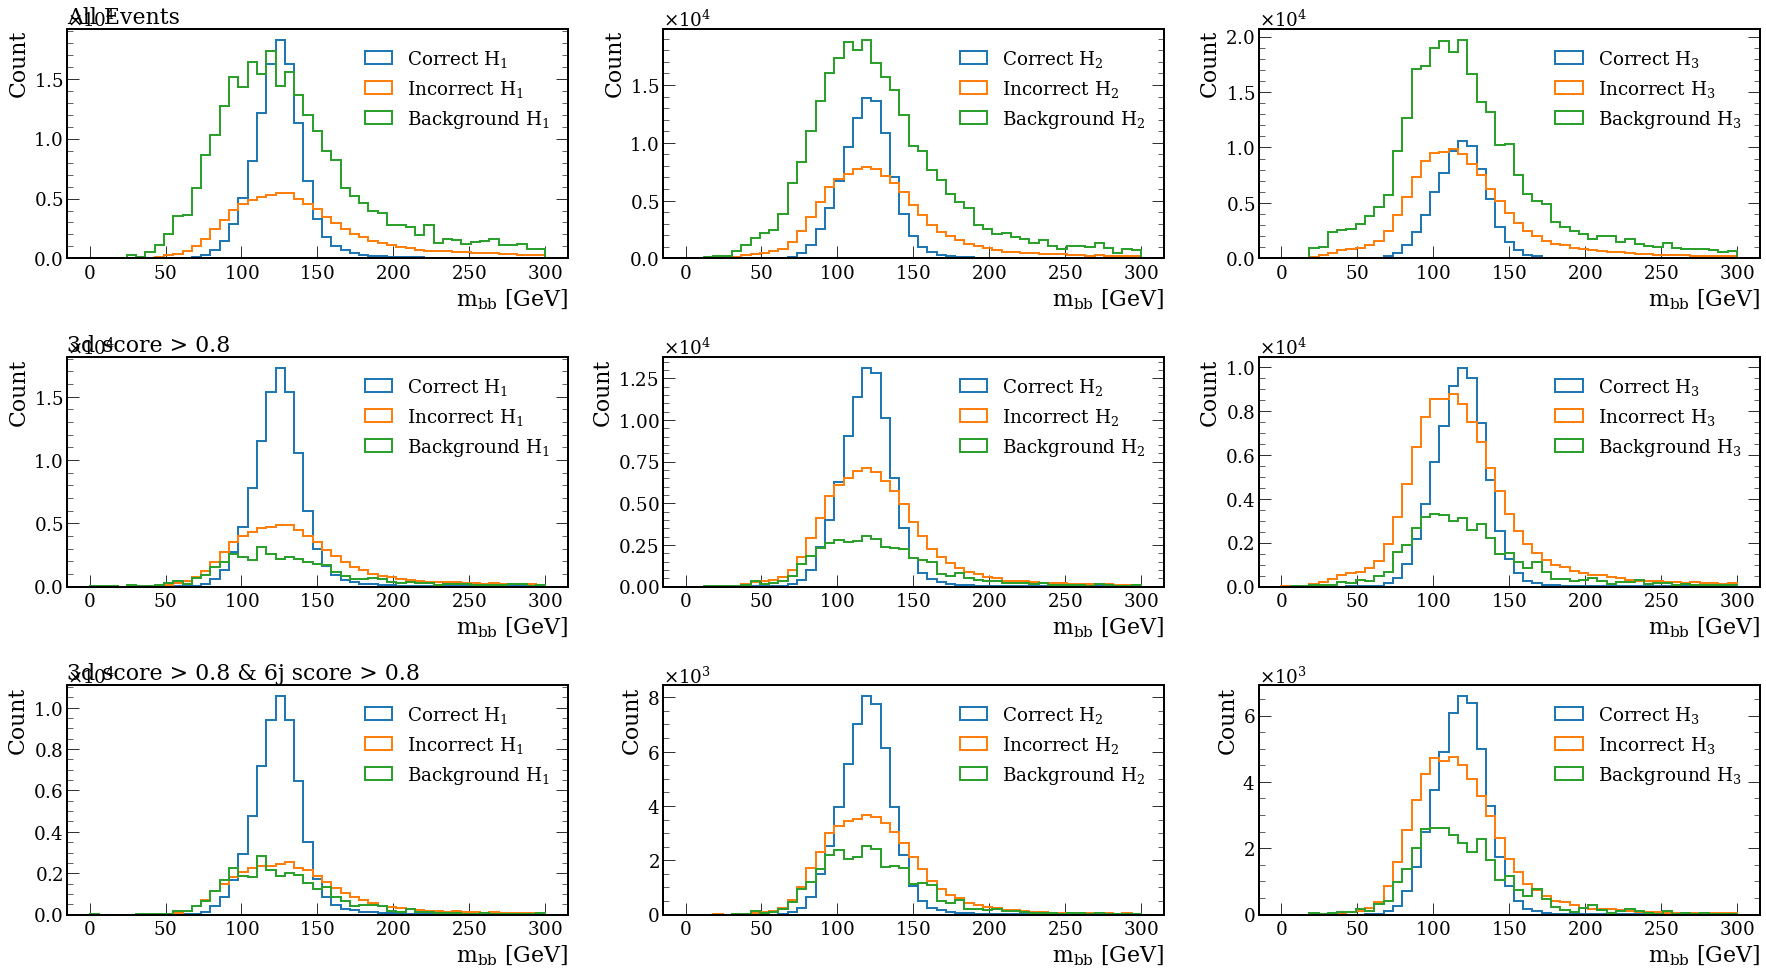

In [39]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(25,14))

ax = axs[0][0]
ax.set_title('All Events', loc='left')
fig, ax, n, b = Hist(right_higgs1, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_1$')
fig, ax, n, b = Hist(wrong_higgs1, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_1$')
fig, ax, n, b = Hist(mH1_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_1$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[0][1]
fig, ax, n, b = Hist(right_higgs2, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_2$')
fig, ax, n, b = Hist(wrong_higgs2, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_2$')
fig, ax, n, b = Hist(mH2_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_2$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[0][2]
fig, ax, n, b = Hist(right_higgs3, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_3$')
fig, ax, n, b = Hist(wrong_higgs3, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_3$')
fig, ax, n, b = Hist(mH3_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_3$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[1][0]
ax.set_title('3d score > 0.8', loc='left')
fig, ax, n, b = Hist(right_higgs1_score, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_1$')
fig, ax, n, b = Hist(wrong_higgs1_score, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_1$')
fig, ax, n, b = Hist(mH1_cut_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_1$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[1][1]
fig, ax, n, b = Hist(right_higgs2_score, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_2$')
fig, ax, n, b = Hist(wrong_higgs2_score, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_2$')
fig, ax, n, b = Hist(mH2_cut_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_2$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[1][2]
fig, ax, n, b = Hist(right_higgs3_score, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_3$')
fig, ax, n, b = Hist(wrong_higgs3_score, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_3$')
fig, ax, n, b = Hist(mH3_cut_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_3$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[2][0]
ax.set_title('3d score > 0.8 & 6j score > 0.8', loc='left')
fig, ax, n, b = Hist(right_higgs1_scores, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_1$')
fig, ax, n, b = Hist(wrong_higgs1_scores, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_1$')
fig, ax, n, b = Hist(mH1_2cut_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_1$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[2][1]
fig, ax, n, b = Hist(right_higgs2_scores, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_2$')
fig, ax, n, b = Hist(wrong_higgs2_scores, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_2$')
fig, ax, n, b = Hist(mH2_2cut_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_2$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[2][2]
fig, ax, n, b = Hist(right_higgs3_scores, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_3$')
fig, ax, n, b = Hist(wrong_higgs3_scores, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_3$')
fig, ax, n, b = Hist(mH3_2cut_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_3$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()

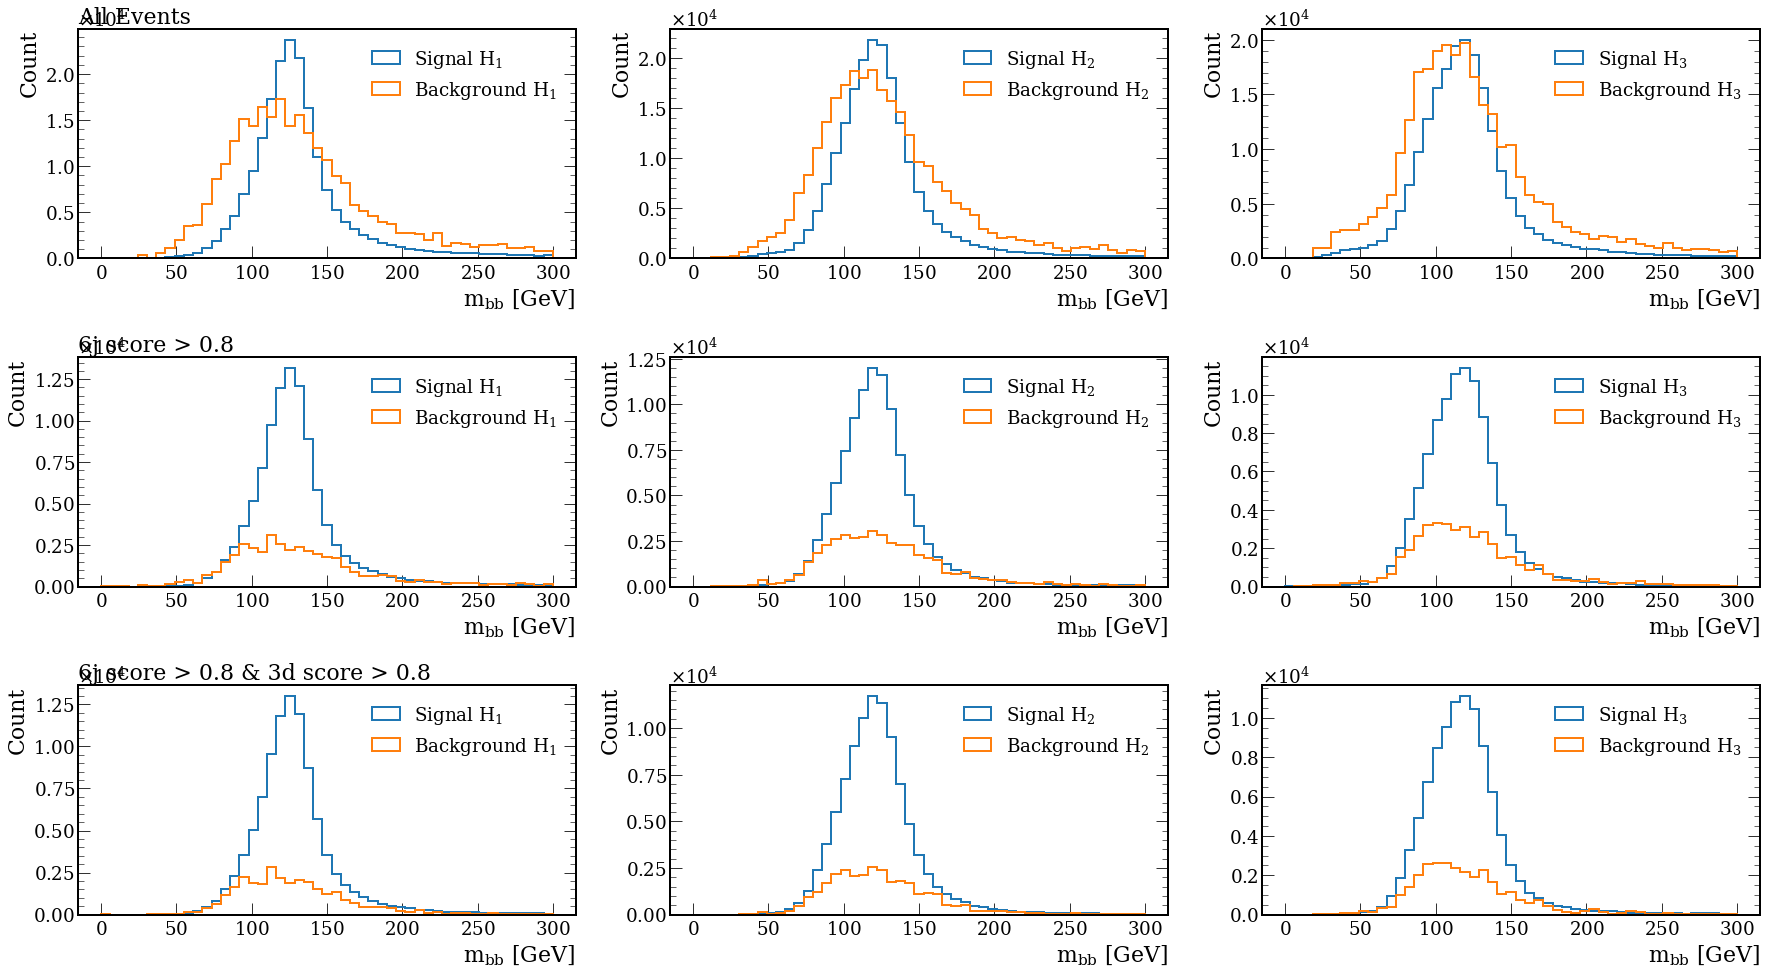

In [40]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(25,14))

ax = axs[0][0]
ax.set_title('All Events', loc='left')
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,0], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_1$')
fig, ax, n, b = Hist(mH1_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_1$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[0][1]
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,1], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_2$')
fig, ax, n, b = Hist(mH2_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_2$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[0][2]
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,2], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_3$')
fig, ax, n, b = Hist(mH3_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_3$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[1][0]
ax.set_title('6j score > 0.8', loc='left')
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,0][b_6j], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_1$')
fig, ax, n, b = Hist(mH1_cut_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_1$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[1][1]
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,1][b_6j], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_2$')
fig, ax, n, b = Hist(mH2_cut_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_2$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[1][2]
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,2][b_6j], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_3$')
fig, ax, n, b = Hist(mH3_cut_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_3$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[2][0]
ax.set_title('6j score > 0.8 & 3d score > 0.8', loc='left')
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,0][b_6j & b_3d], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_1$')
fig, ax, n, b = Hist(mH1_2cut_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_1$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[2][1]
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,1][b_6j & b_3d], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_2$')
fig, ax, n, b = Hist(mH2_2cut_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_2$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[2][2]
fig, ax, n, b = Hist(signal_tree.nn_higgs_m[:,2][b_6j & b_3d], bins=mH_bins, fig=fig, ax=ax, label=r'Signal H$_3$')
fig, ax, n, b = Hist(mH3_2cut_list, bins=mH_bins, fig=fig, ax=ax, label=r'Background H$_3$', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()

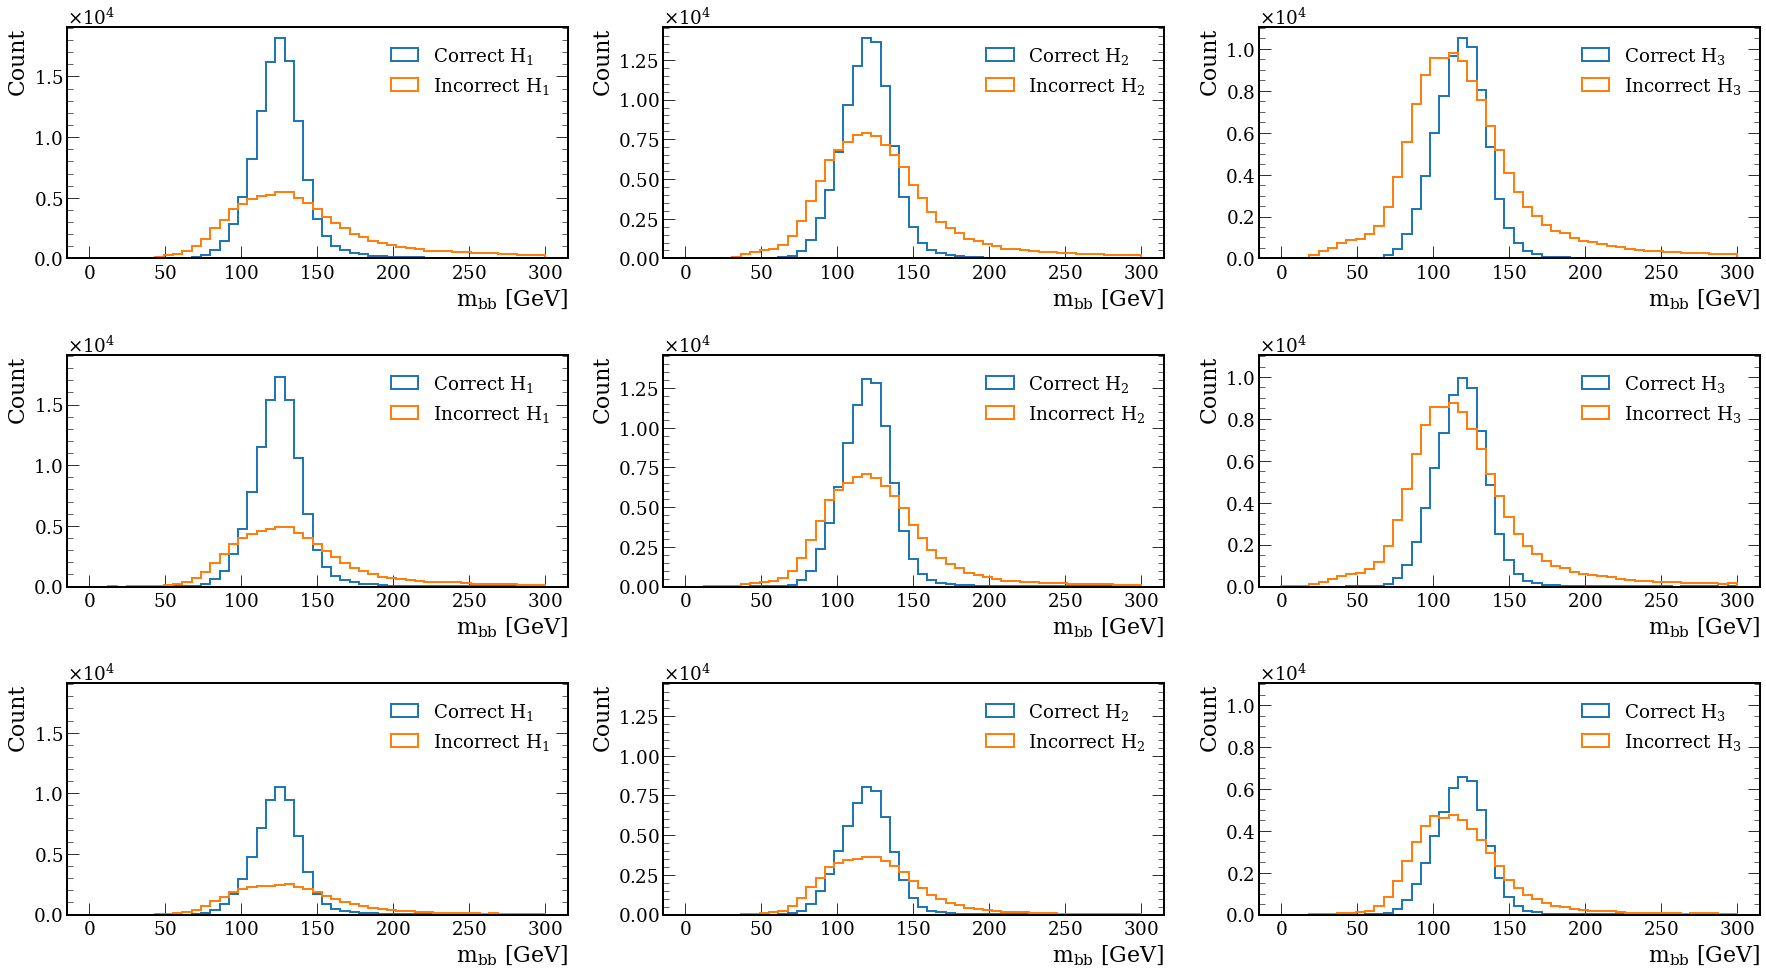

In [41]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(25,14))

ax = axs[0][0]
fig, ax, n, b = Hist(right_higgs1, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_1$')
fig, ax, n, b = Hist(wrong_higgs1, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_1$')
ymin1, ymax1 = ax.get_ylim()
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[0][1]
fig, ax, n, b = Hist(right_higgs2, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_2$')
fig, ax, n, b = Hist(wrong_higgs2, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_2$')
ymin2, ymax2 = ax.get_ylim()
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[0][2]
fig, ax, n, b = Hist(right_higgs3, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_3$')
fig, ax, n, b = Hist(wrong_higgs3, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_3$')
ymin3, ymax3 = ax.get_ylim()
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[1][0]
fig, ax, n, b = Hist(right_higgs1_score, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_1$')
fig, ax, n, b = Hist(wrong_higgs1_score, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_1$')
ax.set_ylim(ymin1, ymax1)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[1][1]
fig, ax, n, b = Hist(right_higgs2_score, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_2$')
fig, ax, n, b = Hist(wrong_higgs2_score, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_2$')
ax.set_ylim(ymin2, ymax2)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[1][2]
fig, ax, n, b = Hist(right_higgs3_score, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_3$')
fig, ax, n, b = Hist(wrong_higgs3_score, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_3$')
ax.set_ylim(ymin3, ymax3)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[2][0]
fig, ax, n, b = Hist(right_higgs1_scores, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_1$')
fig, ax, n, b = Hist(wrong_higgs1_scores, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_1$')
ax.set_ylim(ymin1, ymax1)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[2][1]
fig, ax, n, b = Hist(right_higgs2_scores, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_2$')
fig, ax, n, b = Hist(wrong_higgs2_scores, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_2$')
ax.set_ylim(ymin2, ymax2)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[2][2]
fig, ax, n, b = Hist(right_higgs3_scores, bins=mH_bins, fig=fig, ax=ax, label=r'Correct H$_3$')
fig, ax, n, b = Hist(wrong_higgs3_scores, bins=mH_bins, fig=fig, ax=ax, label=r'Incorrect H$_3$')
ax.set_ylim(ymin3, ymax3)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()

In [42]:
t6_right = signal_tree.t6_higgs_m[signal_tree.t6_higgs_signalId > -1]
t6_wrong = signal_tree.t6_higgs_m[signal_tree.t6_higgs_signalId < 0]

t6_right_6b = signal_tree.t6_higgs_m[signal_tree.nfound_t6 == 6][signal_tree.t6_higgs_signalId[signal_tree.nfound_t6 == 6] > -1]
t6_wrong_6b = signal_tree.t6_higgs_m[signal_tree.nfound_t6 == 6][signal_tree.t6_higgs_signalId[signal_tree.nfound_t6 == 6] < 0]

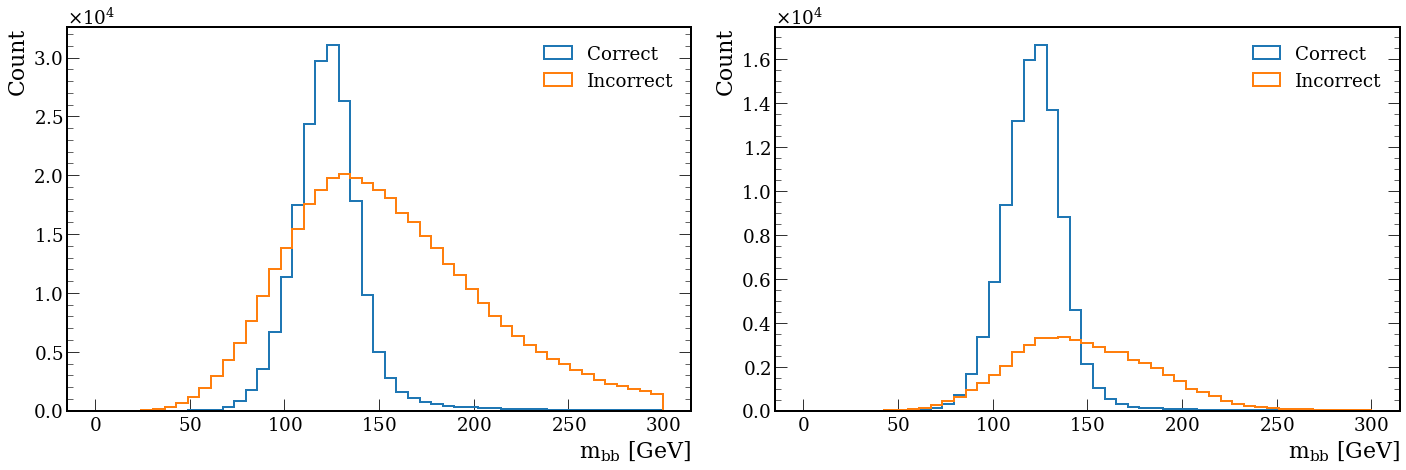

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

ax = axs[0]
fig, ax, n, b = Hist(ak.flatten(t6_right), bins=mH_bins, fig=fig, ax=ax, label='Correct')
fig, ax, n, b = Hist(ak.flatten(t6_wrong), bins=mH_bins, fig=fig, ax=ax, label='Incorrect')
# fig, ax, n, b = Hist(, weights=, bins=mH_bins, fig=fig, ax=ax, label='Background')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[1]
fig, ax, n, b = Hist(ak.flatten(t6_right_6b), bins=mH_bins, fig=fig, ax=ax, label='Correct')
fig, ax, n, b = Hist(ak.flatten(t6_wrong_6b), bins=mH_bins, fig=fig, ax=ax, label='Incorrect')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()

In [44]:
t6_mH1_list = []
t6_mH2_list = []
t6_mH3_list = []

t6_mH1_6jcut_list = []
t6_mH2_6jcut_list = []
t6_mH3_6jcut_list = []

t6_mH1_6jcut_3mHcut_list = []
t6_mH2_6jcut_3mHcut_list = []
t6_mH3_6jcut_3mHcut_list = []

t6_mH1_6jcut_1mHcut_list = []
t6_mH2_6jcut_1mHcut_list = []
t6_mH3_6jcut_1mHcut_list = []

t6_mH1_6jcut_mH2cut_list = []
t6_mH2_6jcut_mH2cut_list = []
t6_mH3_6jcut_mH2cut_list = []

t6_mH1_6jcut_mH3cut_list = []
t6_mH2_6jcut_mH3cut_list = []
t6_mH3_6jcut_mH3cut_list = []

t6_mH1_6jcut_3mHcut_SR_list = []
t6_mH2_6jcut_3mHcut_SR_list = []
t6_mH3_6jcut_3mHcut_SR_list = []

t6_mH1_6jcut_1mHcut_SR_list = []
t6_mH2_6jcut_1mHcut_SR_list = []
t6_mH3_6jcut_1mHcut_SR_list = []

t6_mH1_6jcut_mH2cut_SR_list = []
t6_mH2_6jcut_mH2cut_SR_list = []
t6_mH3_6jcut_mH2cut_SR_list = []

t6_mH1_6jcut_mH3cut_SR_list = []
t6_mH2_6jcut_mH3cut_SR_list = []
t6_mH3_6jcut_mH3cut_SR_list = []

for mH_arr, score_6j in zip(bkgd_tree.t6_higgs_m, bkgd_tree.b_6j_score):
    t6_mH1_list.append(mH_arr[:,0])
    t6_mH2_list.append(mH_arr[:,1])
    t6_mH3_list.append(mH_arr[:,2])

    t6_mH1_6jcut_list.append(mH_arr[:,0][score_6j > 0.8])
    t6_mH2_6jcut_list.append(mH_arr[:,1][score_6j > 0.8])
    t6_mH3_6jcut_list.append(mH_arr[:,2][score_6j > 0.8])

    t6_mH1_6jcut_3mHcut_list.append(mH_arr[:,0][(score_6j > 0.8) & ak.all(abs(mH_arr - 125) > 60, axis=1)])
    t6_mH2_6jcut_3mHcut_list.append(mH_arr[:,1][(score_6j > 0.8) & ak.all(abs(mH_arr - 125) > 60, axis=1)])
    t6_mH3_6jcut_3mHcut_list.append(mH_arr[:,2][(score_6j > 0.8) & ak.all(abs(mH_arr - 125) > 60, axis=1)])

    t6_mH1_6jcut_3mHcut_SR_list.append(mH_arr[:,0][(score_6j > 0.8) & ak.all(abs(mH_arr - 125) < 60, axis=1)])
    t6_mH2_6jcut_3mHcut_SR_list.append(mH_arr[:,1][(score_6j > 0.8) & ak.all(abs(mH_arr - 125) < 60, axis=1)])
    t6_mH3_6jcut_3mHcut_SR_list.append(mH_arr[:,2][(score_6j > 0.8) & ak.all(abs(mH_arr - 125) < 60, axis=1)])

    t6_mH1_6jcut_1mHcut_list.append(mH_arr[:,0][(score_6j > 0.8) & (abs(mH_arr[:,0] - 125) > 60)])
    t6_mH2_6jcut_1mHcut_list.append(mH_arr[:,1][(score_6j > 0.8) & (abs(mH_arr[:,0] - 125) > 60)])
    t6_mH3_6jcut_1mHcut_list.append(mH_arr[:,2][(score_6j > 0.8) & (abs(mH_arr[:,0] - 125) > 60)])

    t6_mH1_6jcut_1mHcut_SR_list.append(mH_arr[:,0][(score_6j > 0.8) & (abs(mH_arr[:,0] - 125) < 60)])
    t6_mH2_6jcut_1mHcut_SR_list.append(mH_arr[:,1][(score_6j > 0.8) & (abs(mH_arr[:,0] - 125) < 60)])
    t6_mH3_6jcut_1mHcut_SR_list.append(mH_arr[:,2][(score_6j > 0.8) & (abs(mH_arr[:,0] - 125) < 60)])

    t6_mH1_6jcut_mH2cut_list.append(mH_arr[:,0][(score_6j > 0.8) & (abs(mH_arr[:,1] - 125) > 60)])
    t6_mH2_6jcut_mH2cut_list.append(mH_arr[:,1][(score_6j > 0.8) & (abs(mH_arr[:,1] - 125) > 60)])
    t6_mH3_6jcut_mH2cut_list.append(mH_arr[:,2][(score_6j > 0.8) & (abs(mH_arr[:,1] - 125) > 60)])

    t6_mH1_6jcut_mH2cut_SR_list.append(mH_arr[:,0][(score_6j > 0.8) & (abs(mH_arr[:,1] - 125) < 60)])
    t6_mH2_6jcut_mH2cut_SR_list.append(mH_arr[:,1][(score_6j > 0.8) & (abs(mH_arr[:,1] - 125) < 60)])
    t6_mH3_6jcut_mH2cut_SR_list.append(mH_arr[:,2][(score_6j > 0.8) & (abs(mH_arr[:,1] - 125) < 60)])

    t6_mH1_6jcut_mH3cut_list.append(mH_arr[:,0][(score_6j > 0.8) & (abs(mH_arr[:,2] - 125) > 60)])
    t6_mH2_6jcut_mH3cut_list.append(mH_arr[:,1][(score_6j > 0.8) & (abs(mH_arr[:,2] - 125) > 60)])
    t6_mH3_6jcut_mH3cut_list.append(mH_arr[:,2][(score_6j > 0.8) & (abs(mH_arr[:,2] - 125) > 60)])

    t6_mH1_6jcut_mH3cut_SR_list.append(mH_arr[:,0][(score_6j > 0.8) & (abs(mH_arr[:,2] - 125) < 60)])
    t6_mH2_6jcut_mH3cut_SR_list.append(mH_arr[:,1][(score_6j > 0.8) & (abs(mH_arr[:,2] - 125) < 60)])
    t6_mH3_6jcut_mH3cut_SR_list.append(mH_arr[:,2][(score_6j > 0.8) & (abs(mH_arr[:,2] - 125) < 60)])

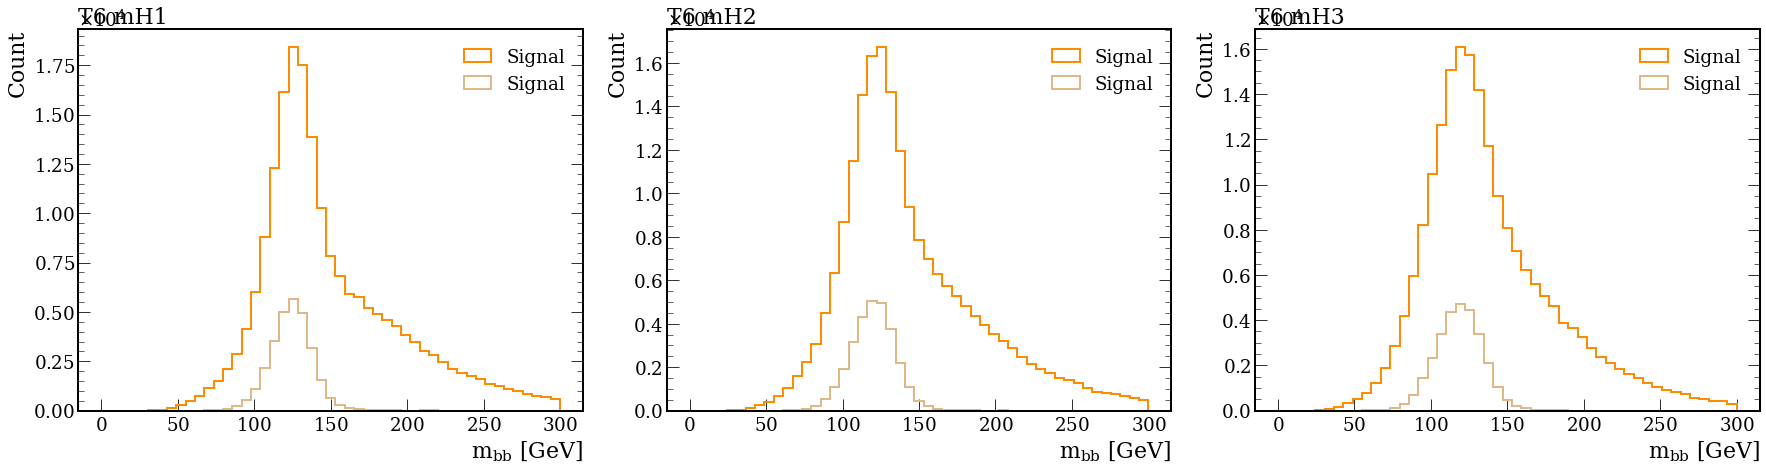

In [45]:
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('T6 mH1', loc='left')
fig, ax, n, b = Hist(signal_tree.t6_higgs_m[:,0], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n, b = Hist(signal_tree.t6_higgs_m[:,0][signal_tree.nfound_t6_h == 3], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='burlywood')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[1]
ax.set_title('T6 mH2', loc='left')
fig, ax, n, b = Hist(signal_tree.t6_higgs_m[:,1], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n, b = Hist(signal_tree.t6_higgs_m[:,1][signal_tree.nfound_t6_h == 3], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='burlywood')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[2]
ax.set_title('T6 mH3', loc='left')
fig, ax, n, b = Hist(signal_tree.t6_higgs_m[:,2], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n, b = Hist(signal_tree.t6_higgs_m[:,2][signal_tree.nfound_t6_h == 3], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='burlywood')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()
fig.savefig('plots/sig_to_bkg/mH3_dist_T6_SIGvBKG_correct.pdf')

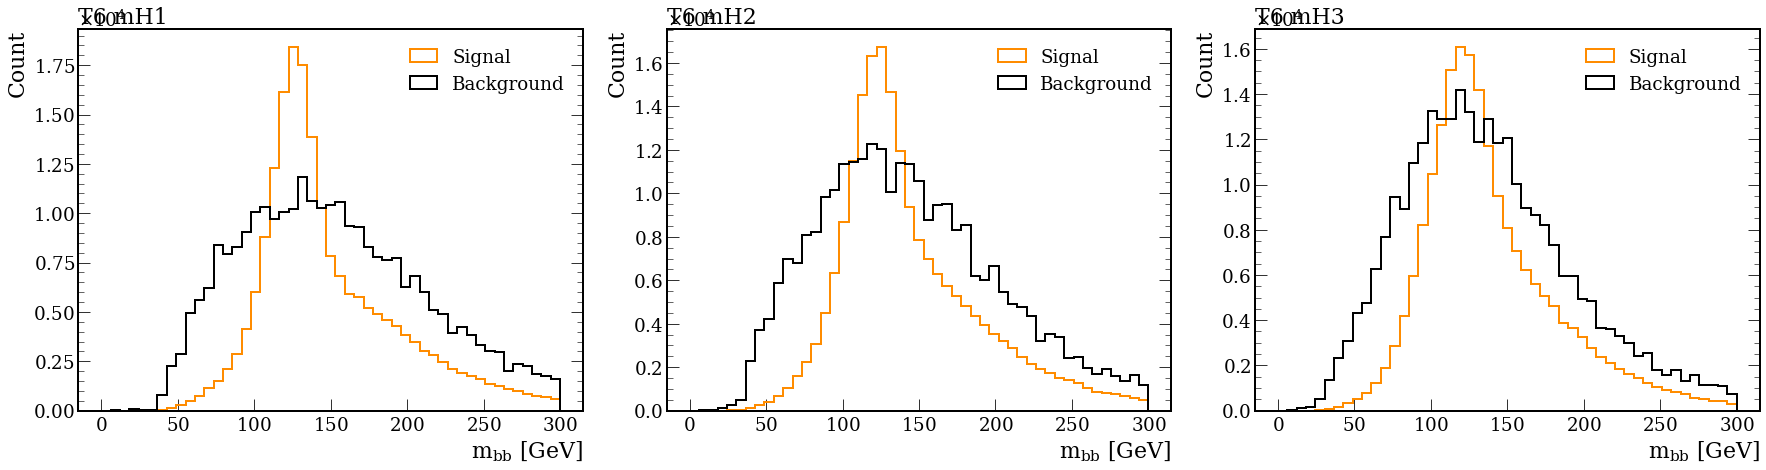

In [46]:
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('T6 mH1', loc='left')
fig, ax, n, b = Hist(signal_tree.t6_higgs_m[:,0], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n, b = Hist(t6_mH1_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[1]
ax.set_title('T6 mH2', loc='left')
fig, ax, n, b = Hist(signal_tree.t6_higgs_m[:,1], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n, b = Hist(t6_mH2_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[2]
ax.set_title('T6 mH3', loc='left')
fig, ax, n, b = Hist(signal_tree.t6_higgs_m[:,2], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n, b = Hist(t6_mH3_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()
fig.savefig('plots/sig_to_bkg/mH3_dist_T6_SIGvBKG.pdf')

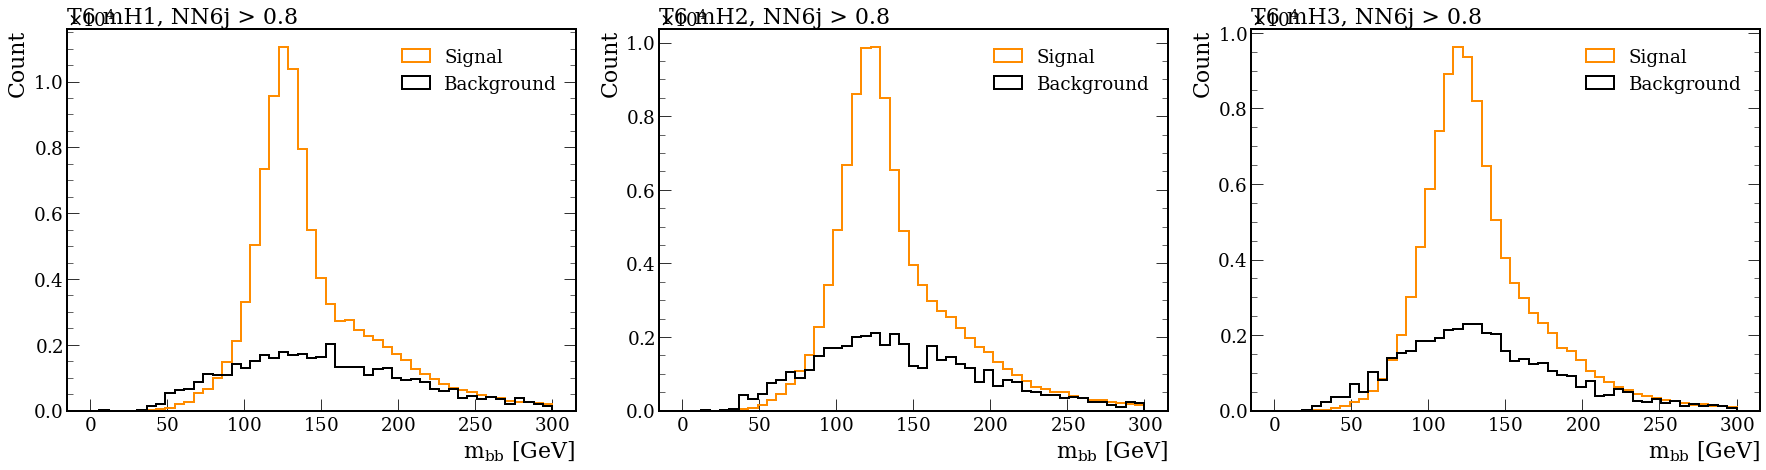

In [47]:
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('T6 mH1, NN6j > 0.8', loc='left')
fig, ax, n, b = Hist(signal_tree.t6_higgs_m[:,0][signal_tree.b_6j_score > 0.8], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n, b = Hist(t6_mH1_6jcut_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[1]
ax.set_title('T6 mH2, NN6j > 0.8', loc='left')
fig, ax, n, b = Hist(signal_tree.t6_higgs_m[:,1][signal_tree.b_6j_score > 0.8], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n, b = Hist(t6_mH2_6jcut_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax = axs[2]
ax.set_title('T6 mH3, NN6j > 0.8', loc='left')
fig, ax, n, b = Hist(signal_tree.t6_higgs_m[:,2][signal_tree.b_6j_score > 0.8], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n, b = Hist(t6_mH3_6jcut_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()
fig.savefig('plots/sig_to_bkg/mH3_dist_T6_SIGvBKG_6jcut.pdf')

535.0493910410787
77897.0


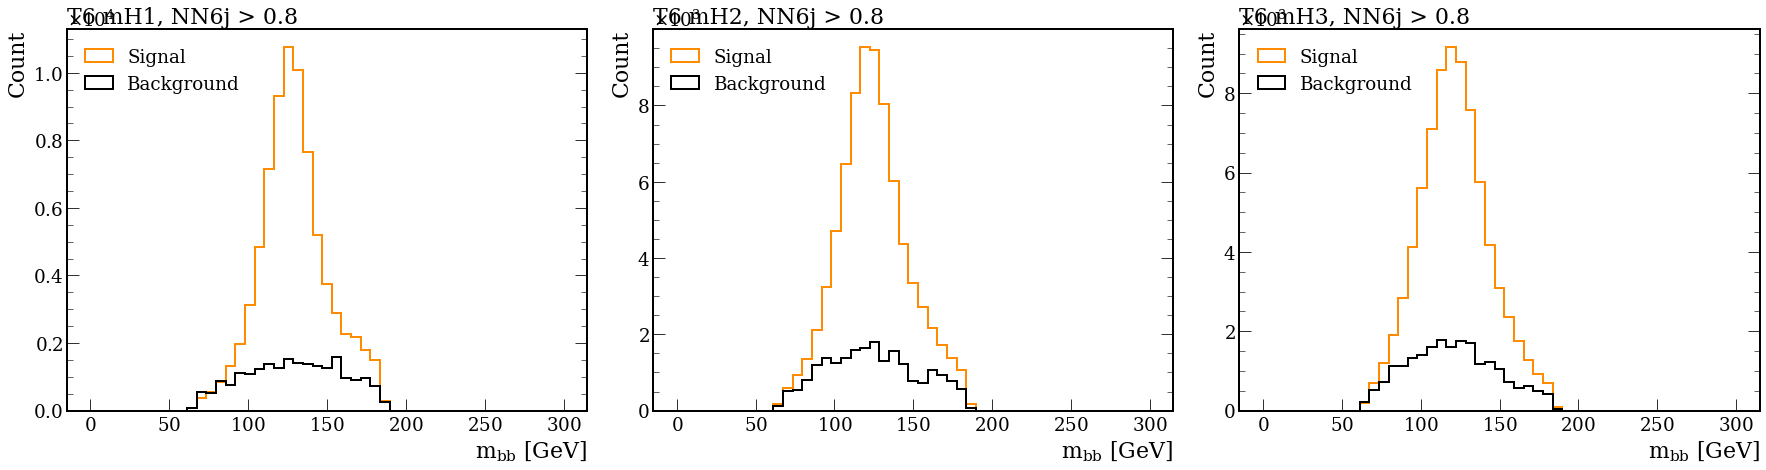

In [48]:
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('T6 mH1, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) < 60, axis=1)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n_b, b = Hist(t6_mH1_6jcut_3mHcut_SR_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.legend(loc=2)
print(n_s.sum()/np.sqrt(n_b.sum()))
print(n_s.sum())
SR_3H = n_s.sum()

ax = axs[1]
ax.set_title('T6 mH2, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) < 60, axis=1)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_b, b = Hist(t6_mH2_6jcut_3mHcut_SR_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.legend(loc=2)

ax = axs[2]
ax.set_title('T6 mH3, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) < 60, axis=1)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_b, b = Hist(t6_mH3_6jcut_3mHcut_SR_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.legend(loc=2)

plt.tight_layout()

fig.savefig('plots/sig_to_bkg/mH3_3mH-SR_T6_SIGvBKG_6jcut.pdf')

In [49]:
29.4/173.7

0.1692573402417962

91.66612397084353
0.06710179640718562


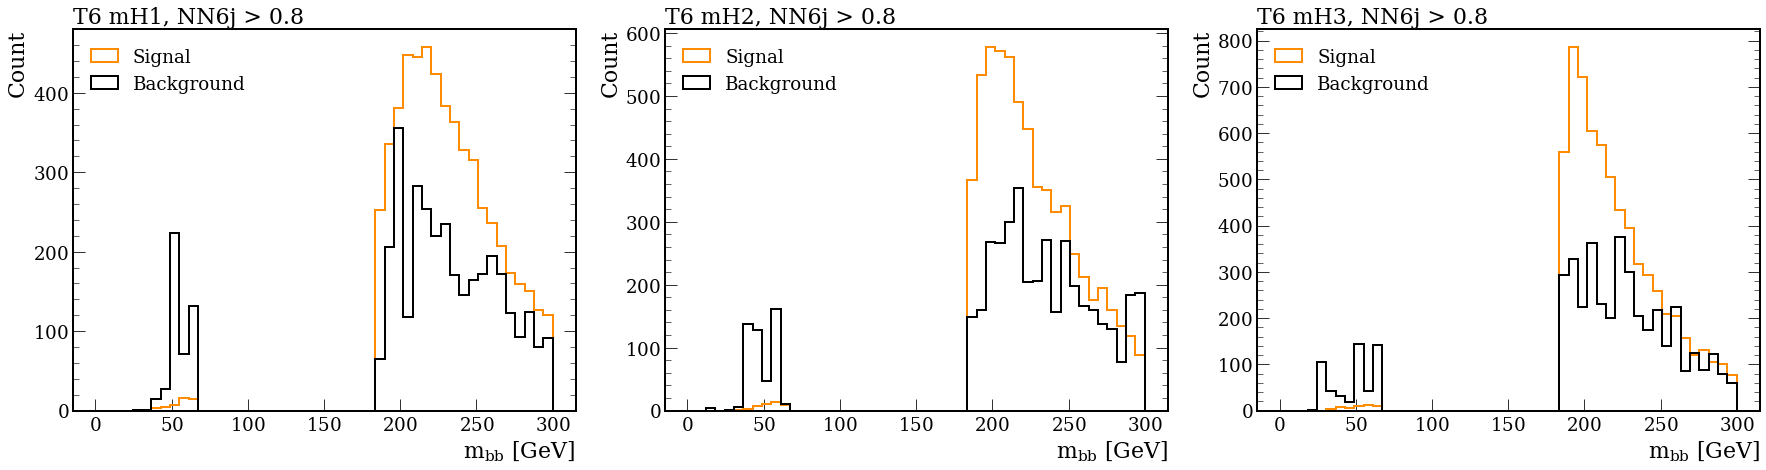

In [50]:
t6_mH1_6jcut_3mHcut_list

fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('T6 mH1, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n_b, b = Hist(t6_mH1_6jcut_3mHcut_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.legend(loc=2)
print(n_s.sum()/np.sqrt(n_b.sum()))
print(n_s.sum()/(SR_3H+n_s.sum()))

ax = axs[1]
ax.set_title('T6 mH2, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_b, b = Hist(t6_mH2_6jcut_3mHcut_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.legend(loc=2)

ax = axs[2]
ax.set_title('T6 mH3, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_b, b = Hist(t6_mH3_6jcut_3mHcut_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.legend(loc=2)

plt.tight_layout()

fig.savefig('plots/sig_to_bkg/mH3_3mH-CR_T6_SIGvBKG_6jcut.pdf')

Incorrect pairings 0.961627699446725
6b Not Present 0.6257362127431733
Found 6b, Paired Wrong 0.2070319471711583
84.872140277535
0.06710179640718562


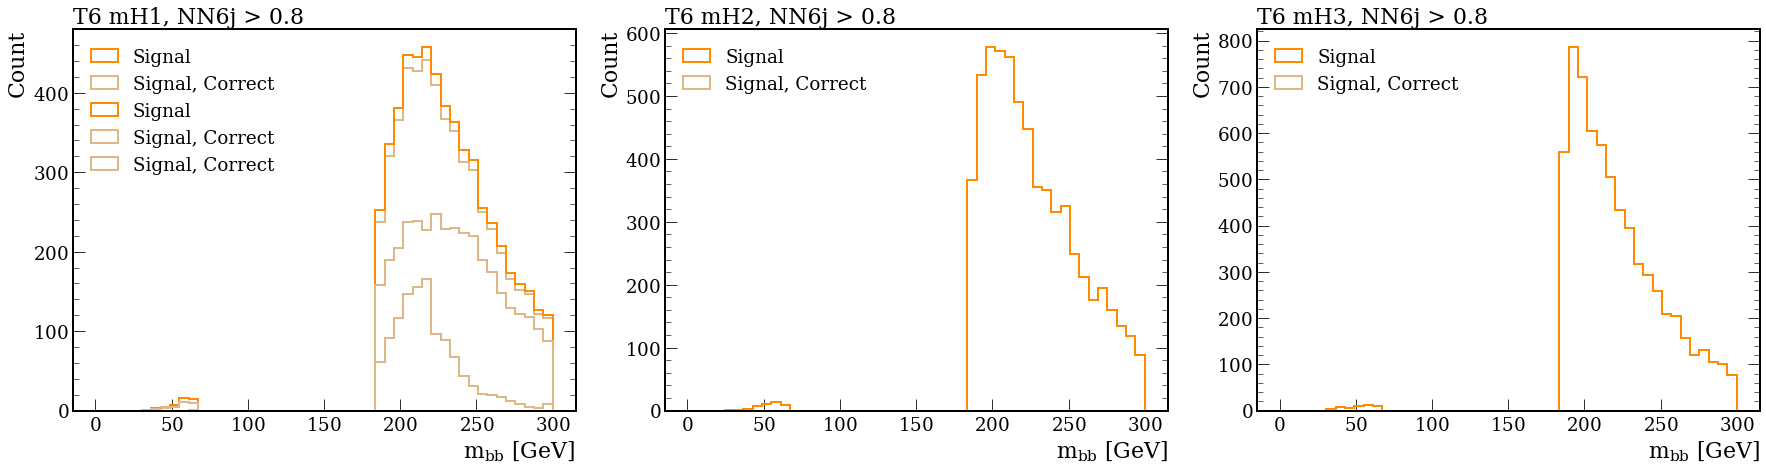

In [51]:
t6_mH1_6jcut_3mHcut_list

fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('T6 mH1, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n_inc, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1) & (signal_tree.nfound_t6_h == 0)], bins=mH_bins, fig=fig, ax=ax, label='Signal, Correct', color='burlywood')
print("Incorrect pairings",n_inc.sum()/n_s.sum())
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n_np, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1) & (signal_tree.nfound_presel != 6)], bins=mH_bins, fig=fig, ax=ax, label='Signal, Correct', color='burlywood')
print("6b Not Present",n_np.sum()/n_s.sum())
fig, ax, n_6b, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1) & (signal_tree.nfound_t6_h != 3) & (signal_tree.nfound_t6 == 6)], bins=mH_bins, fig=fig, ax=ax, label='Signal, Correct', color='burlywood')
print("Found 6b, Paired Wrong",n_6b.sum()/n_s.sum())
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.legend(loc=2)
print(n_s.sum()/np.sqrt(n_b.sum()))
print(n_s.sum()/(SR_3H+n_s.sum()))

ax = axs[1]
ax.set_title('T6 mH2, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1) & (signal_tree.nfound_t6_h == 3)], bins=mH_bins, fig=fig, ax=ax, label='Signal, Correct', color='burlywood')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.legend(loc=2)

ax = axs[2]
ax.set_title('T6 mH3, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1) & (signal_tree.nfound_t6_h == 3)], bins=mH_bins, fig=fig, ax=ax, label='Signal, Correct', color='burlywood')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.legend(loc=2)

plt.tight_layout()

fig.savefig('plots/sig_to_bkg/mH3_3mH-CR_T6_SIGvBKG_6jcut.pdf')

81.6154010022057
0.06469352224290088


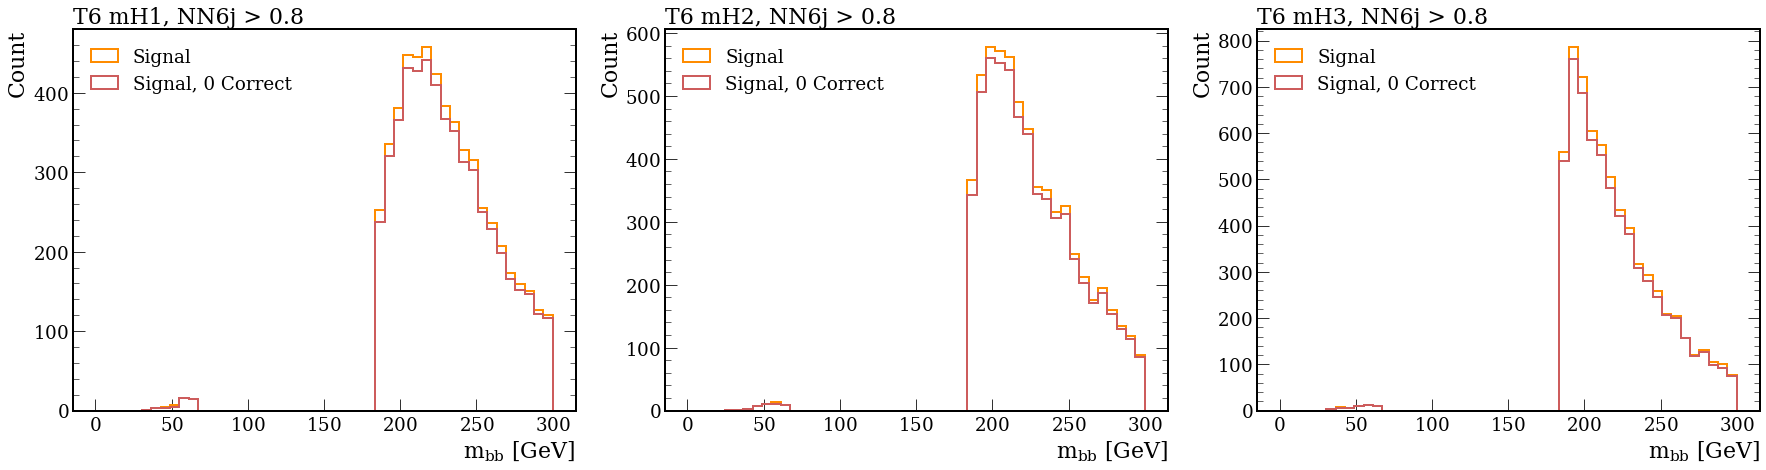

In [52]:
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('T6 mH1, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1) & (signal_tree.nfound_t6_h == 0)], bins=mH_bins, fig=fig, ax=ax, label='Signal, 0 Correct', color='indianred')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.legend(loc=2)
print(n_s.sum()/np.sqrt(n_b.sum()))
print(n_s.sum()/(SR_3H+n_s.sum()))

ax = axs[1]
ax.set_title('T6 mH2, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1) & (signal_tree.nfound_t6_h == 0)], bins=mH_bins, fig=fig, ax=ax, label='Signal, 0 Correct', color='indianred')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.legend(loc=2)

ax = axs[2]
ax.set_title('T6 mH3, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1) & (signal_tree.nfound_t6_h == 0)], bins=mH_bins, fig=fig, ax=ax, label='Signal, 0 Correct', color='indianred')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.legend(loc=2)

plt.tight_layout()

fig.savefig('plots/sig_to_bkg/mH3_3mH-CR_T6_SIGvBKG_6jcut_incorrect.pdf')

In [53]:
ak.sum((signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,0] - 125) < 60))/ak.sum(signal_tree.b_6j_score > 0.8)

0.8180994063691039

In [54]:
ak.sum((signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,1] - 125) < 60))/ak.sum(signal_tree.b_6j_score > 0.8)

0.8505882696975309

In [ ]:
ak.sum((signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,2] - 125) < 60))/ak.sum(signal_tree.b_6j_score > 0.8)

0.8806195656412056

In [ ]:
ak.sum((signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,0] - 125) < 60) & (abs(signal_tree.t6_higgs_m[:,1] - 125) < 60) & (abs(signal_tree.t6_higgs_m[:,2] - 125) < 60))/ak.sum(signal_tree.b_6j_score > 0.8)

0.7593090809841307

164.36814351204015


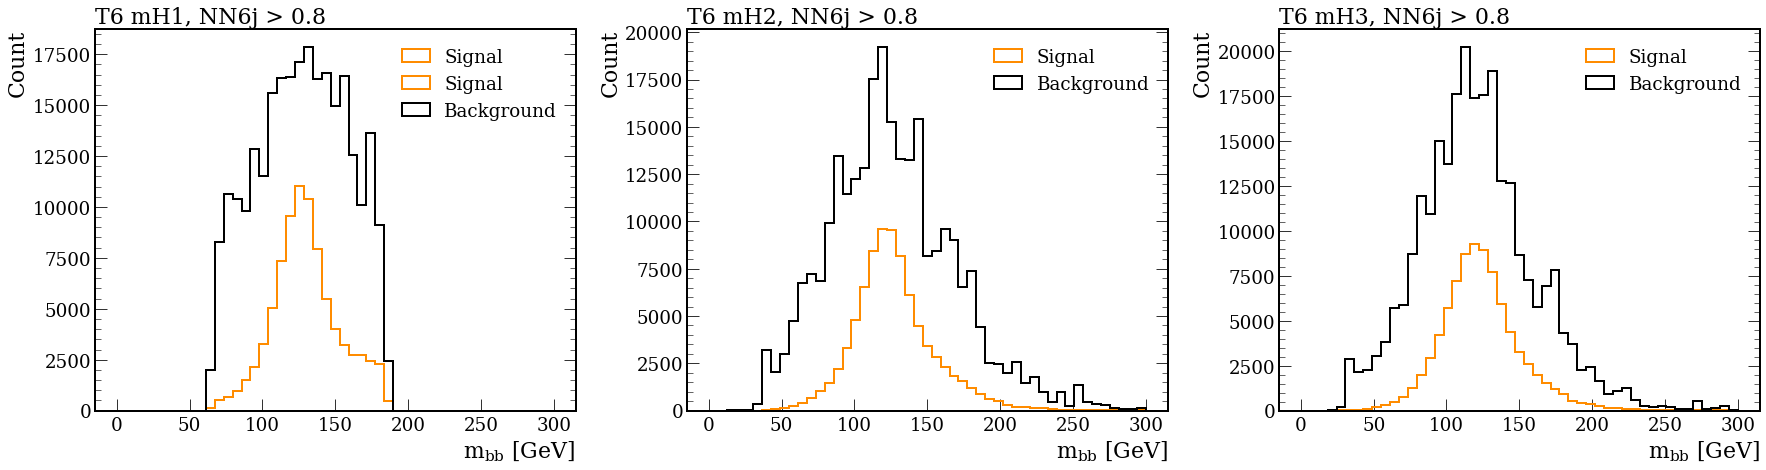

In [ ]:
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('T6 mH1, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,0] - 125) < 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,0] - 125) < 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n_b, b = Hist(t6_mH1_6jcut_1mHcut_SR_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
print(n_s.sum()/np.sqrt(n_b.sum()))
SR_H1 = n_s.sum()

ax = axs[1]
ax.set_title('T6 mH2, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,0] - 125) < 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_b, b = Hist(t6_mH2_6jcut_1mHcut_SR_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[2]
ax.set_title('T6 mH3, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,0] - 125) < 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_b, b = Hist(t6_mH3_6jcut_1mHcut_SR_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()

fig.savefig('plots/sig_to_bkg/mH3_mH-SR_T6_SIGvBKG_6jcut.pdf')

In [ ]:
45.8/164.4

0.27858880778588807

0.158254070743438
0.0006549100391755278


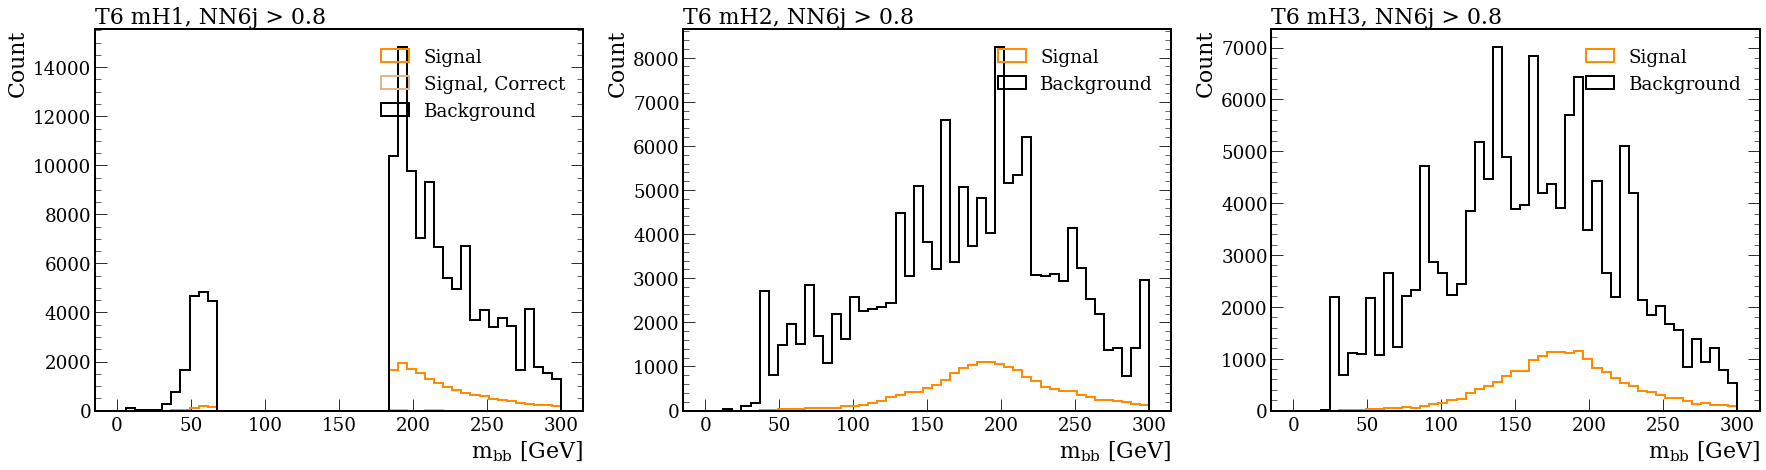

In [ ]:
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('T6 mH1, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,0] - 125) > 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,0] - 125) > 60) & (signal_tree.nfound_t6_h == 3)], bins=mH_bins, fig=fig, ax=ax, label='Signal, Correct', color='burlywood')
fig, ax, n_b, b = Hist(t6_mH1_6jcut_1mHcut_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
print(n_s.sum()/np.sqrt(n_b.sum()))
print(n_s.sum()/(SR_H1+n_s.sum()))

ax = axs[1]
ax.set_title('T6 mH2, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,0] - 125) > 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_b, b = Hist(t6_mH2_6jcut_1mHcut_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[2]
ax.set_title('T6 mH3, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,0] - 125) > 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_b, b = Hist(t6_mH3_6jcut_1mHcut_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()

fig.savefig('plots/sig_to_bkg/mH3_mH-CR_T6_SIGvBKG_6jcut.pdf')

Incorrect 0.8624544655194071
Mis-paired 0.20229870619268936
Not present 0.6229116945107399
78.01045015521437
0.15946238282188926


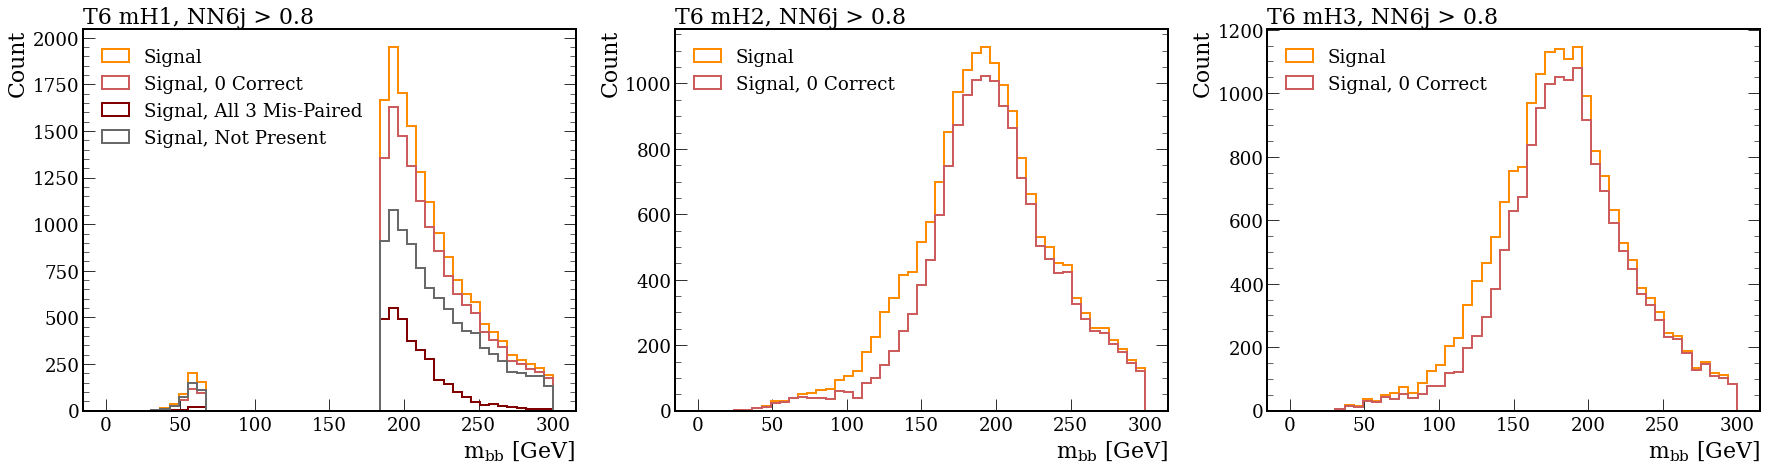

In [ ]:
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('T6 mH1, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,0] - 125) > 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n_s_inc, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,0] - 125) > 60) & (signal_tree.nfound_t6_h == 0)], bins=mH_bins, fig=fig, ax=ax, label='Signal, 0 Correct', color='indianred')
print("Incorrect",n_s_inc.sum()/(n_s.sum()))
fig, ax, n_s_mis, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,0] - 125) > 60) & (signal_tree.nfound_t6_h != 3) & (signal_tree.nfound_t6 == 6)], bins=mH_bins, fig=fig, ax=ax, label='Signal, All 3 Mis-Paired', color='maroon')
print("Mis-paired",n_s_mis.sum()/(n_s.sum()))
fig, ax, n_s_np, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,0] - 125) > 60) & (signal_tree.nfound_t6_h != 3) & (signal_tree.nfound_presel != 6)], bins=mH_bins, fig=fig, ax=ax, label='Signal, Not Present', color='dimgray')
print("Not present",n_s_np.sum()/(n_s.sum()))
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.legend(loc=2)
print(n_s.sum()/np.sqrt(n_b.sum()))
print(n_s.sum()/(SR_H1+n_s.sum()))

ax = axs[1]
ax.set_title('T6 mH2, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,0] - 125) > 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,0] - 125) > 60) & (signal_tree.nfound_t6_h == 0)], bins=mH_bins, fig=fig, ax=ax, label='Signal, 0 Correct', color='indianred')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.legend(loc=2)

ax = axs[2]
ax.set_title('T6 mH3, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,0] - 125) > 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,0] - 125) > 60) & (signal_tree.nfound_t6_h == 0)], bins=mH_bins, fig=fig, ax=ax, label='Signal, 0 Correct', color='indianred')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
ax.legend(loc=2)

plt.tight_layout()

fig.savefig('plots/sig_to_bkg/mH3_mH-CR_T6_SIGvBKG_6jcut_incorrect.pdf')

164.75904140291382


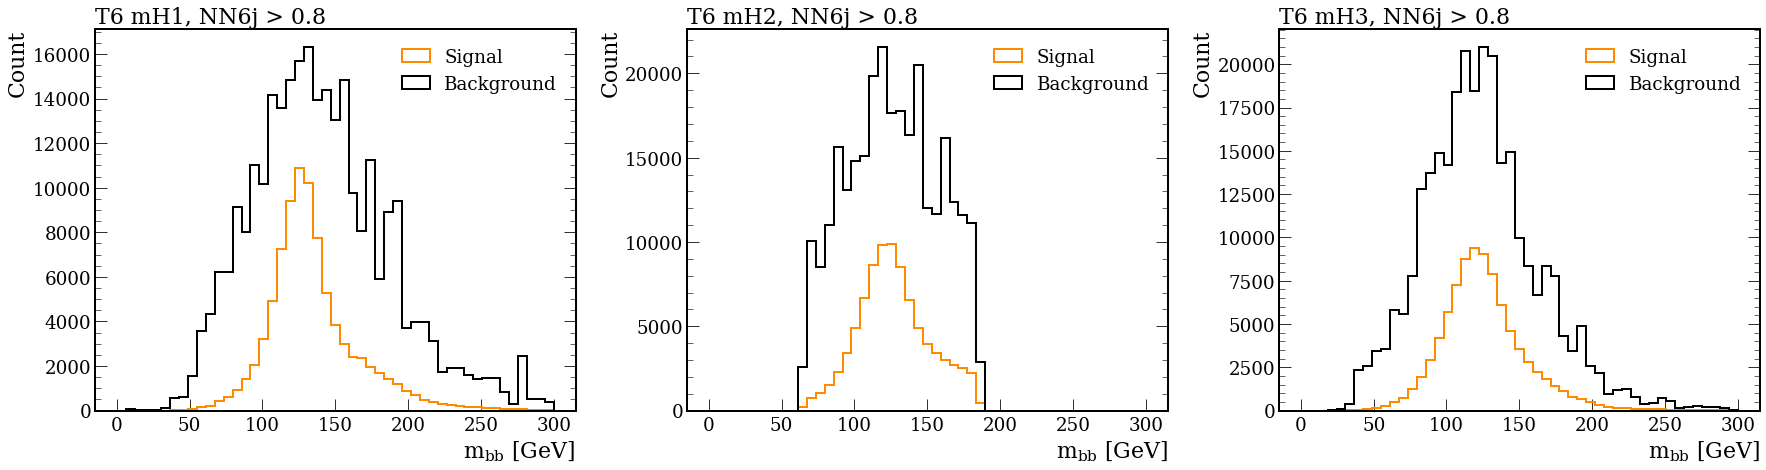

In [ ]:
t6_mH1_6jcut_3mHcut_list

fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('T6 mH1, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,1] - 125) < 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n_b, b = Hist(t6_mH1_6jcut_mH2cut_SR_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
print(n_s.sum()/np.sqrt(n_b.sum()))
SR_H2 = n_s.sum()

ax = axs[1]
ax.set_title('T6 mH2, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,1] - 125) < 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_b, b = Hist(t6_mH2_6jcut_mH2cut_SR_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[2]
ax.set_title('T6 mH3, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,1] - 125) < 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_b, b = Hist(t6_mH3_6jcut_mH2cut_SR_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()

fig.savefig('plots/sig_to_bkg/mH3_mH2-SR_T6_SIGvBKG_6jcut.pdf')

In [ ]:
40.6/165

0.24606060606060606

40.63010007062133
0.131539940709879


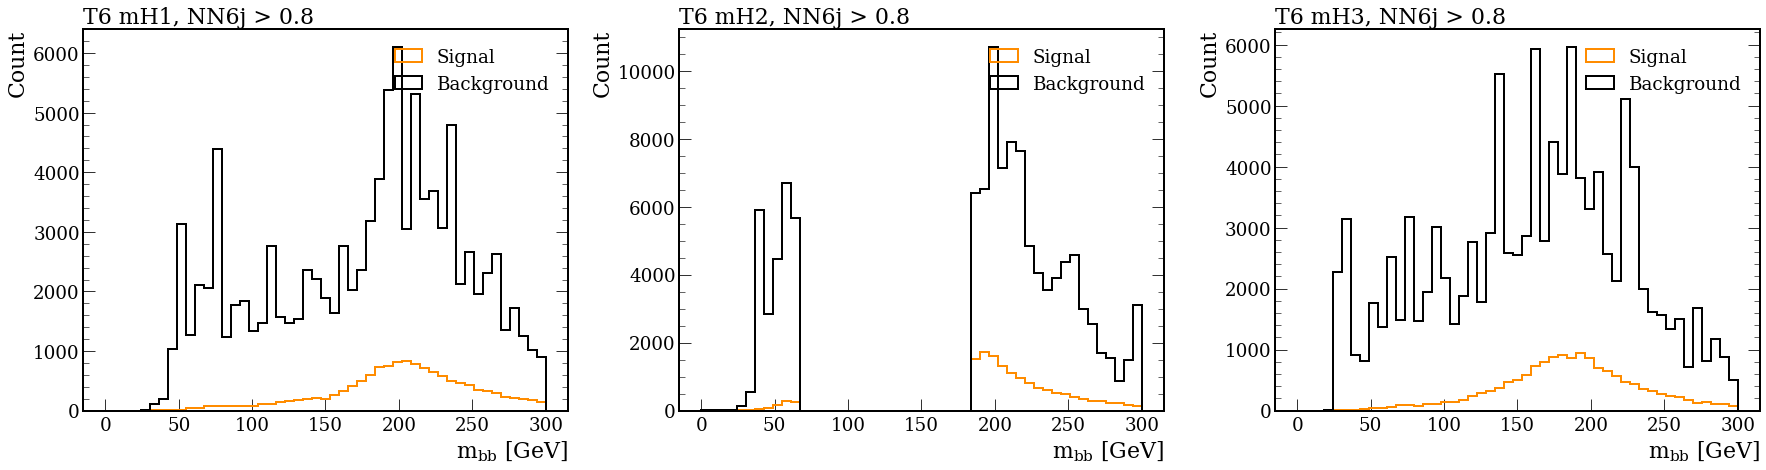

In [ ]:
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('T6 mH1, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,1] - 125) > 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n_b, b = Hist(t6_mH1_6jcut_mH2cut_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
print(n_s.sum()/np.sqrt(n_b.sum()))
print(n_s.sum()/(SR_H2+n_s.sum()))

ax = axs[1]
ax.set_title('T6 mH2, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,1] - 125) > 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_b, b = Hist(t6_mH2_6jcut_mH2cut_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[2]
ax.set_title('T6 mH3, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,1] - 125) > 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_b, b = Hist(t6_mH3_6jcut_mH2cut_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()

fig.savefig('plots/sig_to_bkg/mH3_mH2-CR_T6_SIGvBKG_6jcut.pdf')

24.751197696509134
0.131539940709879
Incorrect 0.8727015558698727
Mis-paired 0.178005657708628
Not present 0.6371994342291372


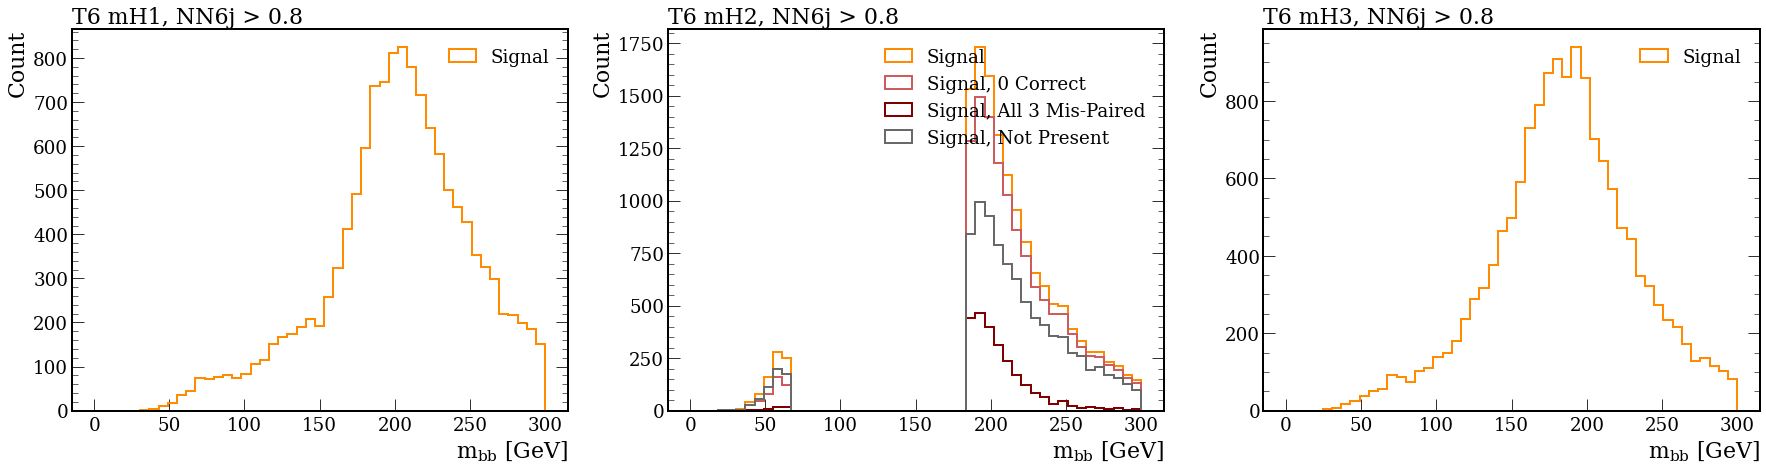

In [ ]:
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('T6 mH1, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,1] - 125) > 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
print(n_s.sum()/np.sqrt(n_b.sum()))
print(n_s.sum()/(SR_H2+n_s.sum()))

ax = axs[1]
ax.set_title('T6 mH2, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,1] - 125) > 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_s_inc, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,1] - 125) > 60) & (signal_tree.nfound_t6_h == 0)], bins=mH_bins, fig=fig, ax=ax, label='Signal, 0 Correct', color='indianred')
print("Incorrect",n_s_inc.sum()/(n_s.sum()))
fig, ax, n_s_mis, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,1] - 125) > 60) & (signal_tree.nfound_t6_h != 3) & (signal_tree.nfound_t6 == 6)], bins=mH_bins, fig=fig, ax=ax, label='Signal, All 3 Mis-Paired', color='maroon')
print("Mis-paired",n_s_mis.sum()/(n_s.sum()))
fig, ax, n_s_np, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,1] - 125) > 60) & (signal_tree.nfound_t6_h != 3) & (signal_tree.nfound_presel != 6)], bins=mH_bins, fig=fig, ax=ax, label='Signal, Not Present', color='dimgray')
print("Not present",n_s_np.sum()/(n_s.sum()))
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[2]
ax.set_title('T6 mH3, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,1] - 125) > 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()

# fig.savefig('plots/sig_to_bkg/mH3_mH2-CR_T6_SIGvBKG_6jcut.pdf')

164.3070714638506


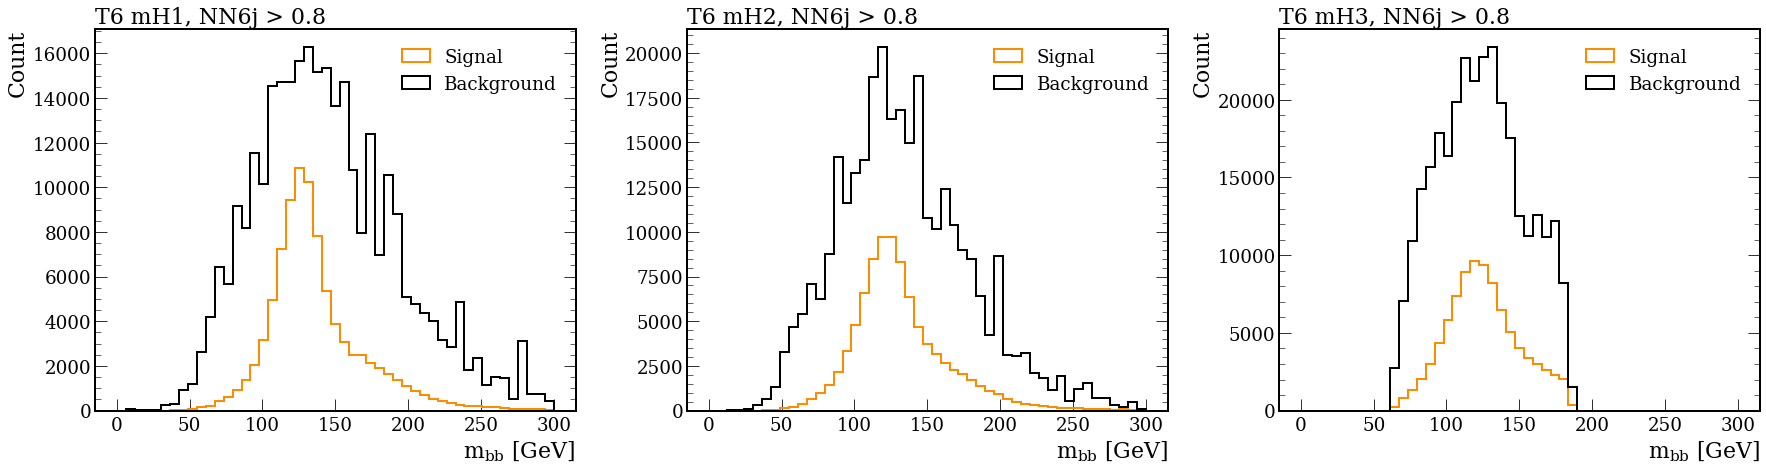

In [ ]:
t6_mH1_6jcut_3mHcut_list

fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('T6 mH1, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,2] - 125) < 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n_b, b = Hist(t6_mH1_6jcut_mH3cut_SR_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
print(n_s.sum()/np.sqrt(n_b.sum()))
SR_H3 = n_s.sum()

ax = axs[1]
ax.set_title('T6 mH2, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,2] - 125) < 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_b, b = Hist(t6_mH2_6jcut_mH3cut_SR_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[2]
ax.set_title('T6 mH3, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,2] - 125) < 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_b, b = Hist(t6_mH3_6jcut_mH3cut_SR_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()

fig.savefig('plots/sig_to_bkg/mH3_mH3-CR_T6_SIGvBKG_6jcut.pdf')

In [ ]:
35.8/164.3

0.21789409616555078

35.797317918084076
0.1049094623828219


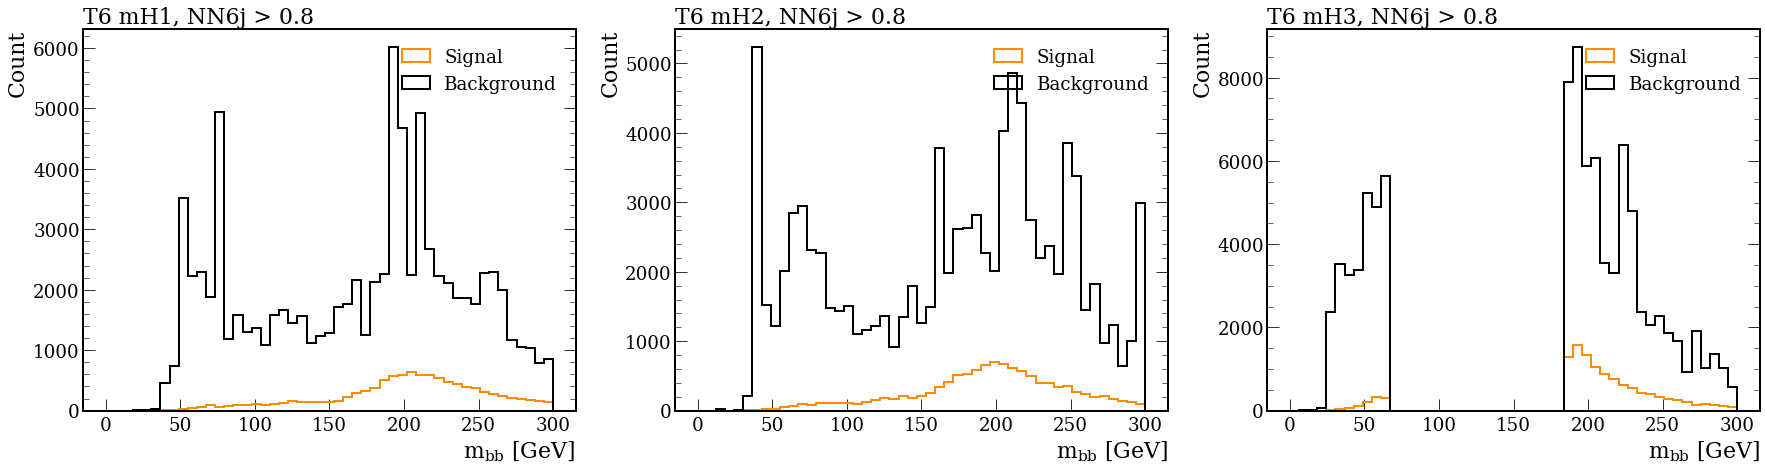

In [ ]:
t6_mH1_6jcut_3mHcut_list

fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('T6 mH1, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,2] - 125) > 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')
fig, ax, n_b, b = Hist(t6_mH1_6jcut_mH3cut_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
print(n_s.sum()/np.sqrt(n_b.sum()))
print(n_s.sum()/(SR_H3+n_s.sum()))

ax = axs[1]
ax.set_title('T6 mH2, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,2] - 125) > 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_b, b = Hist(t6_mH2_6jcut_mH3cut_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[2]
ax.set_title('T6 mH3, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,2] - 125) > 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_b, b = Hist(t6_mH3_6jcut_mH3cut_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale, color='k')
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()

fig.savefig('plots/sig_to_bkg/mH3_mH3-CR_T6_SIGvBKG_6jcut.pdf')

19.07595295232561
0.1049094623828219
Incorrect 0.9984566578067393
Mis-paired 0.1623081539912544
Incorrect & Mis-Paired 0.8361485038154849
Not present 0.6538626425447998


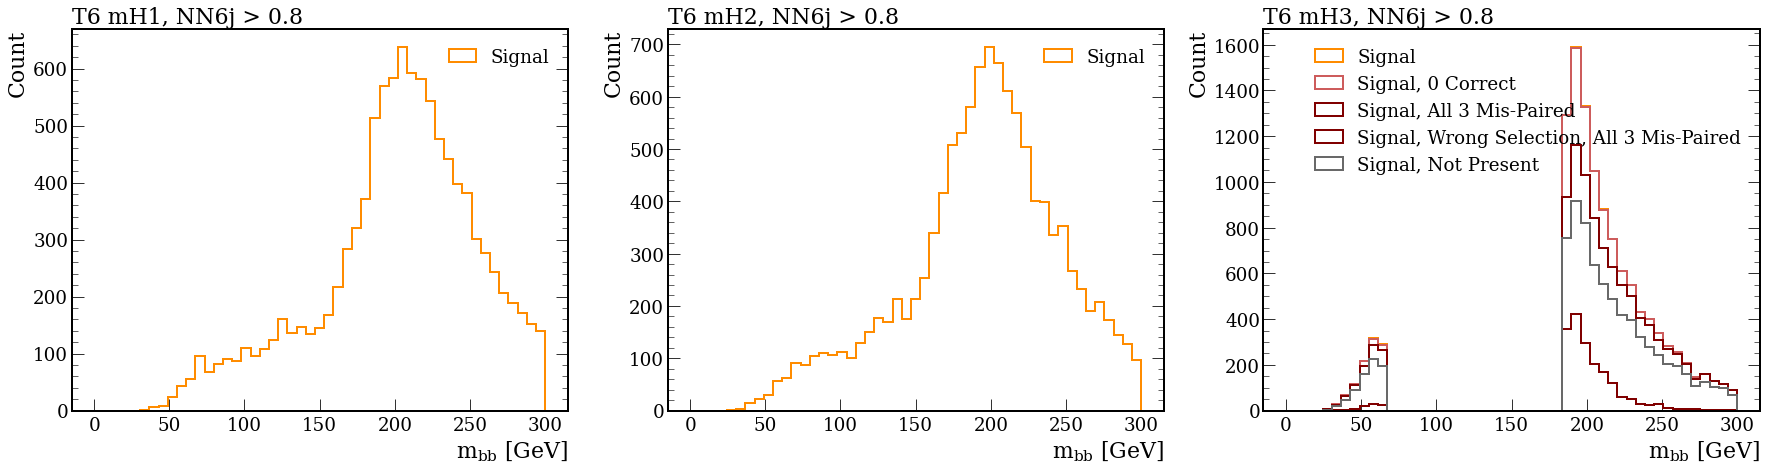

In [ ]:
t6_mH1_6jcut_3mHcut_list

fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('T6 mH1, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,0][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,2] - 125) > 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')

ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')
print(n_s.sum()/np.sqrt(n_b.sum()))
print(n_s.sum()/(SR_H3+n_s.sum()))

ax = axs[1]
ax.set_title('T6 mH2, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,1][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,2] - 125) > 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)

ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

ax = axs[2]
ax.set_title('T6 mH3, NN6j > 0.8', loc='left')
fig, ax, n_s, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,2] - 125) > 60)], bins=mH_bins, fig=fig, ax=ax, label='Signal', color='darkorange')#)
fig, ax, n_s_inc, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,2] - 125) > 60) & (signal_tree.nfound_t6_h != 3)], bins=mH_bins, fig=fig, ax=ax, label='Signal, 0 Correct', color='indianred')
print("Incorrect",n_s_inc.sum()/(n_s.sum()))
fig, ax, n_s_mis, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,2] - 125) > 60) & (signal_tree.nfound_t6_h != 3) & (signal_tree.nfound_t6 == 6)], bins=mH_bins, fig=fig, ax=ax, label='Signal, All 3 Mis-Paired', color='maroon')
print("Mis-paired",n_s_mis.sum()/(n_s.sum()))
fig, ax, n_s_mis_inc, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,2] - 125) > 60) & (signal_tree.nfound_t6_h != 3) & (signal_tree.nfound_t6 != 6)], bins=mH_bins, fig=fig, ax=ax, label='Signal, Wrong Selection, All 3 Mis-Paired', color='maroon')
print("Incorrect & Mis-Paired",n_s_mis_inc.sum()/(n_s.sum()))
fig, ax, n_s_np, b = Hist(signal_tree.t6_higgs_m[:,2][(signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,2] - 125) > 60) & (signal_tree.nfound_t6_h != 3) & (signal_tree.nfound_presel != 6)], bins=mH_bins, fig=fig, ax=ax, label='Signal, Not Present', color='dimgray')
print("Not present",n_s_np.sum()/(n_s.sum()))
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()

# fig.savefig('plots/sig_to_bkg/mH3_mH3-CR_T6_SIGvBKG_6jcut.pdf')

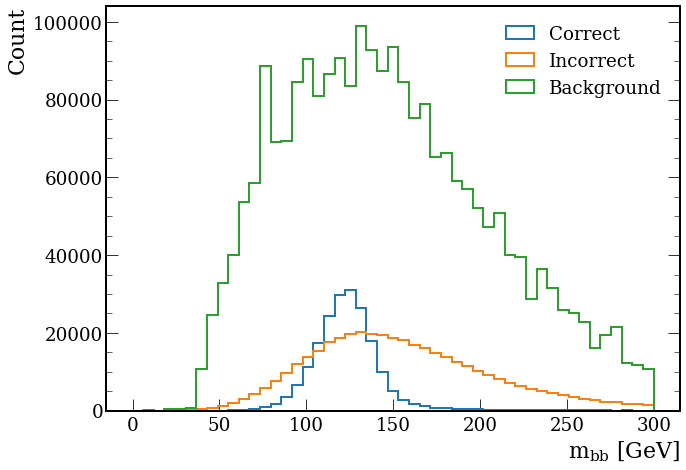

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

fig, ax, n, b = Hist(ak.flatten(t6_right), bins=mH_bins, fig=fig, ax=ax, label='Correct')#)
fig, ax, n, b = Hist(ak.flatten(t6_wrong), bins=mH_bins, fig=fig, ax=ax, label='Incorrect')
fig, ax, n, b = Hist(t6_mH1_list, bins=mH_bins, fig=fig, ax=ax, label='Background', scale=bkgd_tree.scale)
ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()